# Selection of target feature and evaluation metric

# Model work flow :-

# Start-->Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sweetviz

import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import roc_auc_score,recall_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

from sklearn.model_selection import GridSearchCV

from mlxtend.classifier import StackingClassifier

import joblib

In [2]:
from imblearn.combine import SMOTETomek

In [3]:
from imblearn.over_sampling import RandomOverSampler

# a.	Load the dataset into Python and identify the type of the dataset features and report them. 

In [4]:
df=pd.read_csv('train_small.csv')
pd.set_option('display.max_columns',None)

In [5]:
df.head()

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
0,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,0,3.22,0.2544,5.98,21,295.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,0,2.71,NaN,5.64,36,299.0,0,12588,2,46,1,0,1,1,NaN,238.34,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,1,3.22,0.1924,6.10,22,373.0,1,12588,2,46,1,0,1,1,NaN,238.33,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,0,3.26,0.3729,5.74,4,329.0,0,12588,2,46,1,0,1,1,NaN,238.29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,0,3.09,0.2508,6.21,26,600.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


# General data checking checking shape and missing value 

In [6]:
df.shape

(2380557, 54)

In [7]:
#3--Targetvariable
df['booked'].value_counts() #imbalanced data binary class classification problem

0    2314169
1      66388
Name: booked, dtype: int64

In [8]:
df['booking_value'].unique() #Regression problem

array([    nan,  286.32, 1831.3 , ..., 1059.78, 1870.62,  323.2 ])

In [9]:
df['clicked'].value_counts() #imbalanced data binary class classification problem

0    2274463
1     106094
Name: clicked, dtype: int64

In [10]:
df['clicked'].value_counts()[0]

2274463

# Click_Through_Rates==No.of clicked(0) / No. of not clicked(1)

In [11]:
Click_Through_Rates= (df['clicked'].value_counts()[1]) / (df['clicked'].value_counts()[0])
Click_Through_Rates

0.0466457357187169

# Conversion_Rates==no. of cases where bothclicked and booked==1 / total no. of clicks

In [12]:
Conversion_Rates=len(df[df['clicked']==1][df['booked']==1]) / (df['clicked'].value_counts()[1])
Conversion_Rates

0.625746979094011

# From analysis Below:------->
#  The "listing_stars"==3 has the maximum clicks a listing received.                                                                                                                                                            #########For listing_stars==3 has the maximum conversion rates on a listing received.

# .corr()-->How both features are related.

In [13]:
(df['listing_review_score']).corr(df['listing_stars'])

0.30486801924112034

# Checking WRT " listing star " by AOT 

In [16]:
len(df[df['listing_stars']==5][df['clicked']==1])

8926

In [17]:
len(df[df['listing_stars']==4][df['clicked']==1])

39220

In [19]:
len(df[df['listing_stars']==3][df['clicked']==1])

40923

In [20]:
len(df[df['listing_stars']==2][df['clicked']==1])

14480

In [21]:
len(df[df['listing_stars']==1][df['clicked']==1])

232

In [22]:
len(df[df['listing_stars']==0][df['clicked']==1])

2313

# The "listing_stars"==3 has the maximum clicks a listing received.

# Checking WRT " conversion rates " by AOT 

In [24]:
len(df[df['listing_stars']==5][df['clicked']==1][df['booked']==1])

5074

In [25]:
len(df[df['listing_stars']==4][df['clicked']==1][df['booked']==1])

24382

In [26]:
len(df[df['listing_stars']==3][df['clicked']==1][df['booked']==1])

26246

In [27]:
len(df[df['listing_stars']==2][df['clicked']==1][df['booked']==1])

9258

In [28]:
len(df[df['listing_stars']==1][df['clicked']==1][df['booked']==1])

111

In [29]:
len(df[df['listing_stars']==0][df['clicked']==1][df['booked']==1])

1317

# For listing_stars==3 has the maximum conversion rates on a listing received.

# Missing value check

In [10]:
df.isnull().sum()

search_id                               0
timestamp                               0
site_id                                 0
user_country_id                         0
user_hist_stars                   2257777
user_hist_paid                    2257063
listing_country_id                      0
listing_id                              0
listing_stars                           0
listing_review_score                 3486
is_brand                                0
location_score1                         0
location_score2                    525992
log_historical_price                    0
listing_position                        0
price_usd                               0
has_promotion                           0
destination_id                          0
length_of_stay                          0
booking_window                          0
num_adults                              0
num_kids                                0
num_rooms                               0
stay_on_saturday                  

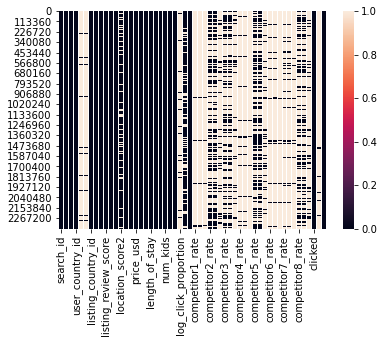

In [11]:
sns.heatmap(df.isnull())   #no missing value in dataset

# Missing values

In [11]:
#Deleting row with a single missing value
df1=df.dropna(how='any')

In [12]:
df.shape,df1.shape #=>All row has a single missing value.

#We have to impute missing values carefully and delete columns ( if necessary)

((2380557, 54), (0, 54))

# Data types

In [13]:
df.dtypes

search_id                           int64
timestamp                          object
site_id                             int64
user_country_id                     int64
user_hist_stars                   float64
user_hist_paid                    float64
listing_country_id                  int64
listing_id                          int64
listing_stars                       int64
listing_review_score              float64
is_brand                            int64
location_score1                   float64
location_score2                   float64
log_historical_price              float64
listing_position                    int64
price_usd                         float64
has_promotion                       int64
destination_id                      int64
length_of_stay                      int64
booking_window                      int64
num_adults                          int64
num_kids                            int64
num_rooms                           int64
stay_on_saturday                  

# b.	Perform summary statistics and explain what issues these statistics reveal.

Summary statistics summarize and provide information about your sample data. It tells you something about the values in your data set. This includes where the mean lies and whether your data is skewed.

In [14]:
df.describe()

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
count,2.380557e+06,2.380557e+06,2.380557e+06,122780.000000,123494.000000,2.380557e+06,2.380557e+06,2.380557e+06,2.377071e+06,2.380557e+06,2.380557e+06,1.854565e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,152107.000000,1.610221e+06,2.380557e+06,59010.000000,63662.000000,46401.000000,965758.000000,1.016116e+06,2.639700e+05,731551.000000,788086.000000,225486.000000,148194.000000,165281.000000,6.286100e+04,1.065082e+06,1.131440e+06,401164.000000,119637.000000,129892.000000,47961.000000,154468.000000,174850.000000,67832.000000,913495.000000,947465.000000,292700.000000,2.380557e+06,66388.000000,2.380557e+06
mean,3.337016e+05,9.970224e+00,1.754588e+02,3.382814,178.094940,1.739159e+02,7.008190e+04,3.180607e+00,3.779416e+00,6.346880e-01,2.878558e+00,1.310325e-01,4.311779e+00,1.686763e+01,2.915203e+02,2.149237e-01,1.404642e+04,2.393825e+00,3.768373e+01,1.969876e+00,3.491460e-01,1.110318e+00,4.982662e-01,-24.398076,1.315759e+03,2.967369e-01,0.484138,0.027740,237.746471,0.043637,3.933803e-02,2.346923e+01,0.016820,0.058079,26.303225,-0.016074,0.096393,1.545803e+02,2.273252e-02,5.156084e-02,29.110785,0.130169,0.076156,17.196243,0.147856,0.083180,20.109919,-0.060010,0.009595,21.731093,4.456688e-02,383.229069,2.788759e-02
std,1.923719e+05,7.667827e+00,6.585934e+01,0.694562,108.568025,6.832483e+01,4.060398e+04,1.052086e+00,1.049727e+00,4.815176e-01,1.536947e+00,1.605939e-01,1.842699e+00,1.042970e+01,2.288292e+04,4.107695e-01,8.117353e+03,2.062891e+00,5.211484e+01,8.580772e-01,7.276573e-01,4.200432e-01,4.999971e-01,16.129689,2.029315e+03,4.568196e-01,0.642136,0.221842,1134.932987,0.447474,2.351395e-01,2.803530e+03,0.457709,0.296175,923.119202,0.576637,0.337104,5.834964e+03,5.205086e-01,2.678607e-01,1469.481661,0.561416,0.301031,29.536009,0.579293,0.317575,63.110961,0.469455,0.203876,800.608005,2.063509e-01,527.019882,1.646508e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,1.500000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-326.567500,1.000000e-02,0.000000e+00,-1.000000,-1.000000,2.000000,-1.000000,-1.000000e+00,2.000000e+00,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.674260e+05,5.000000e+00,1.000000e+02,2.950000,111.090000,1.000000e+02,3.502800e+04,3.000000e+00,3.500000e+00,0.000000e+00,1.790000e+00,1.910000e-02,4.440000e+00,8.000000e+00,8.500000e+01,0.000000e+00,7.115000e+03,1.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-31.267400,1.427400e+02,0.000000e+00,0.000000,0.000000,7.000000,0.000000,0.000000e+00,7.000000e+00,0.000000,0.00000

In [14]:
#We can see there are negative values in the dataset.
#log_click_proportion, competitor1_rate, ETC..->which is unrealistic
#to deal with such unrealistic -ve value we will add a positive constant throught the numerical columns in the dataset  and take log.
#Such operation doesnot change the distribution of the data.
#The positive constant added must be greater than the max -ve value in the dataset("log_click_proportion")= -326.567500
#But there are almost 90% data missing in "log_click_proportion" .if we dicide to drop it the we will add just +5
#As the lowest -ve value is (-1)-->competitor1_rate
#NOW,
#Lets add 350 to cancel all the negative values in the dataset when proceeding.

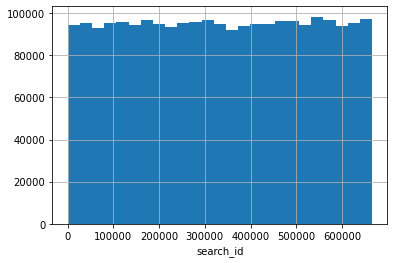

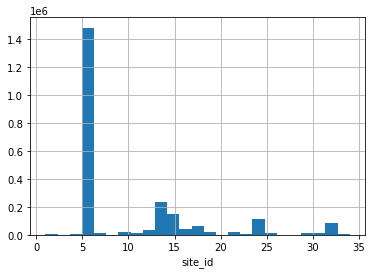

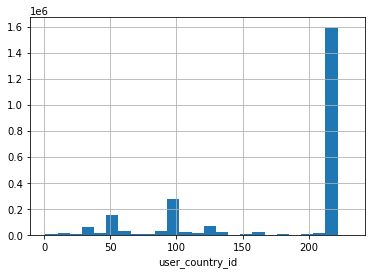

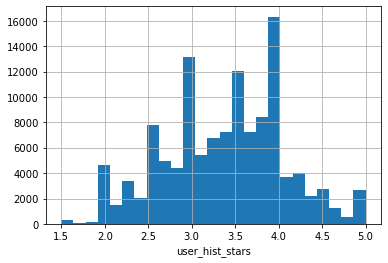

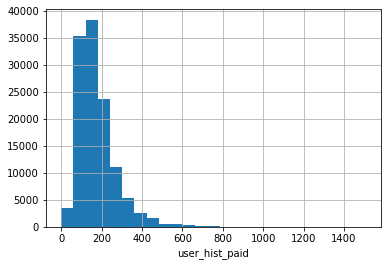

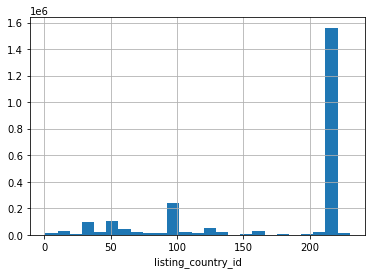

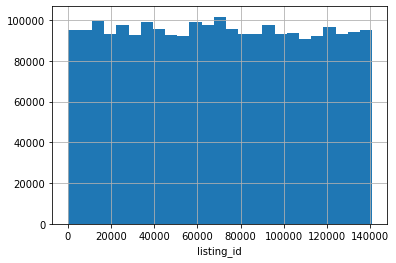

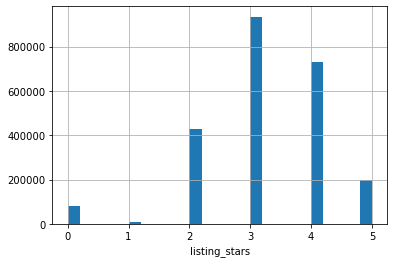

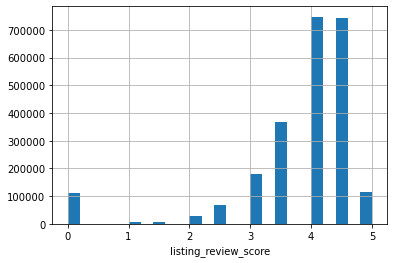

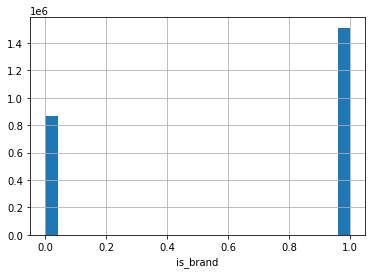

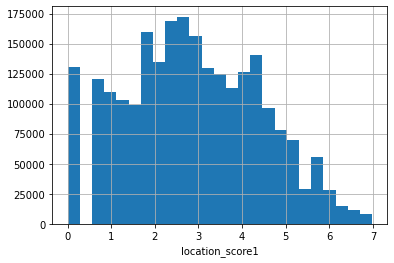

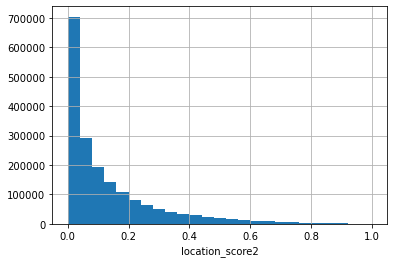

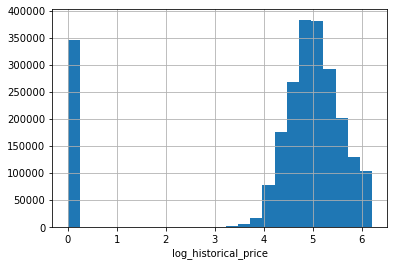

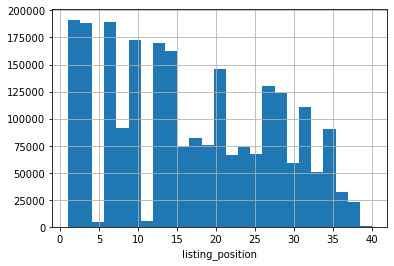

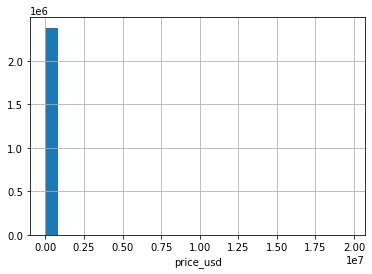

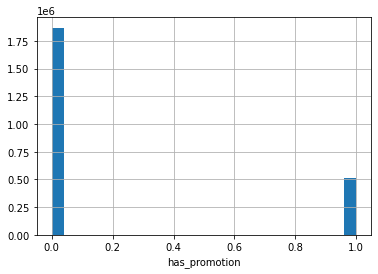

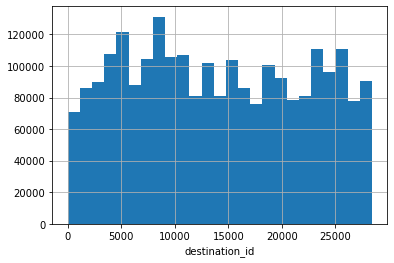

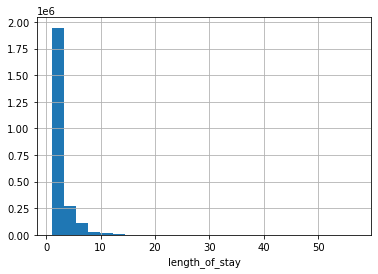

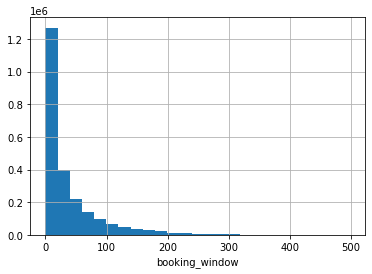

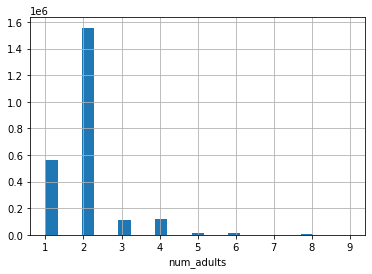

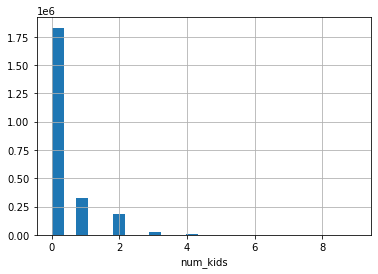

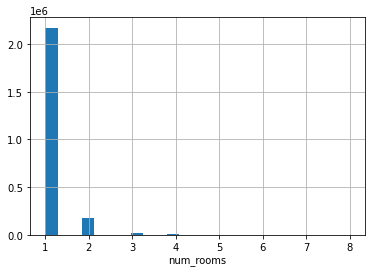

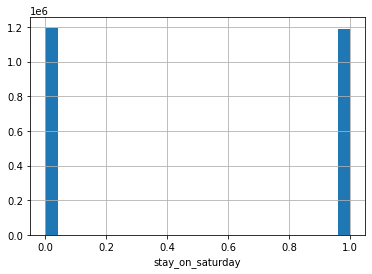

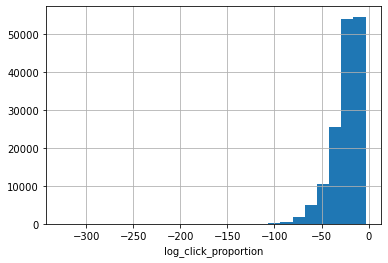

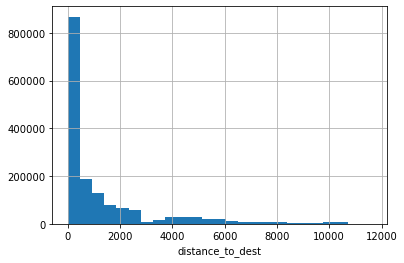

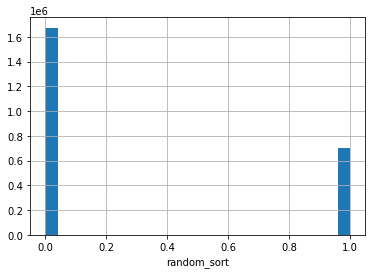

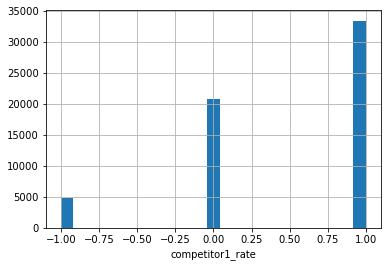

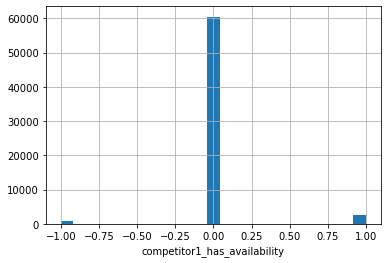

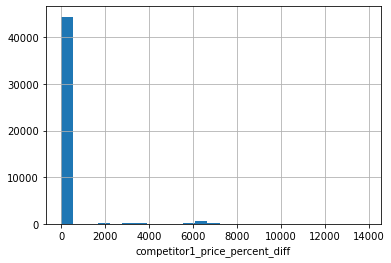

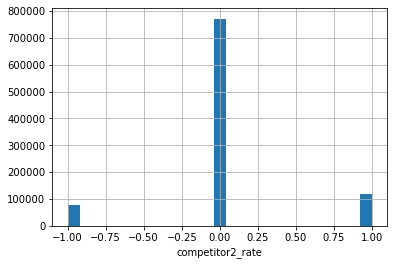

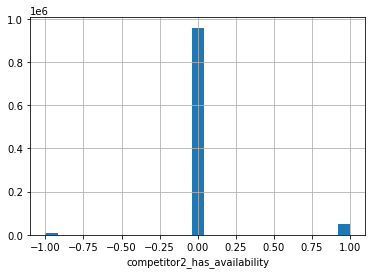

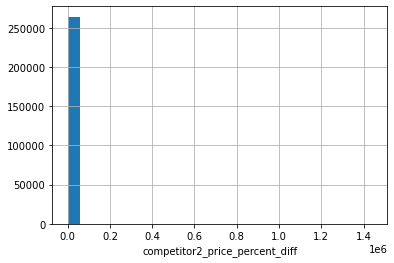

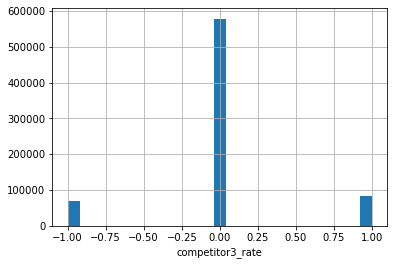

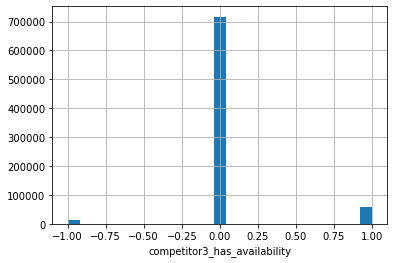

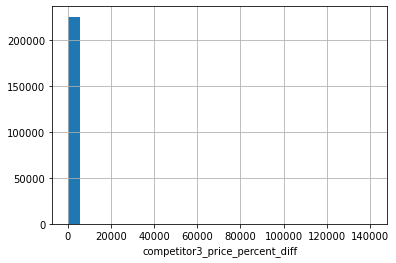

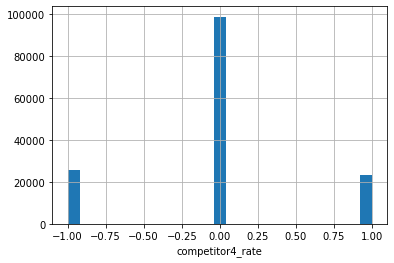

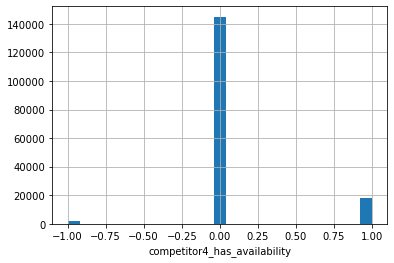

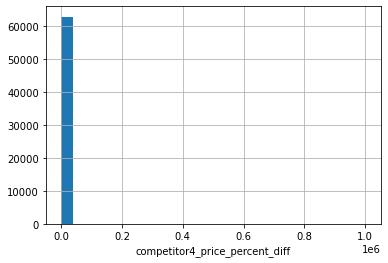

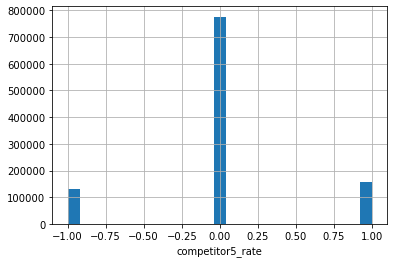

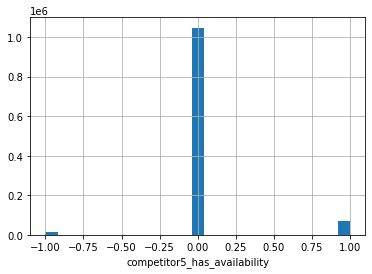

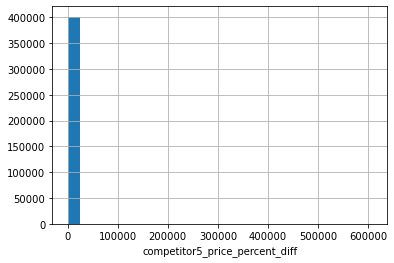

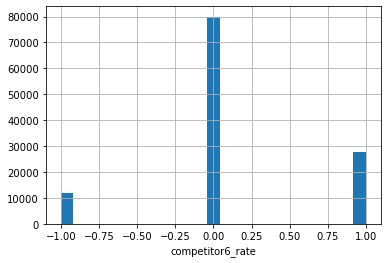

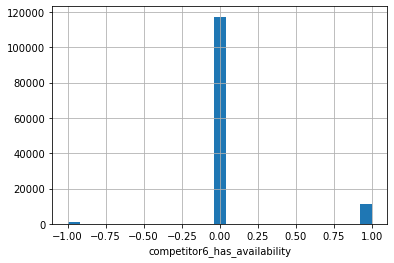

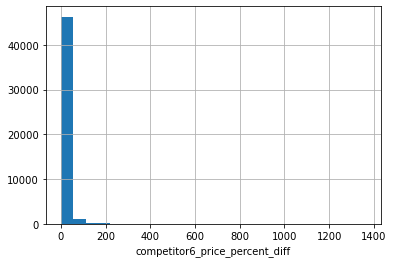

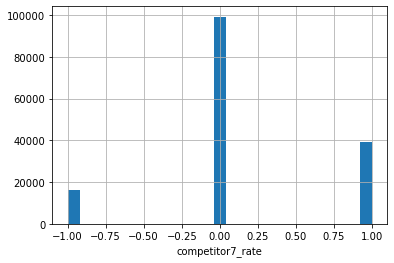

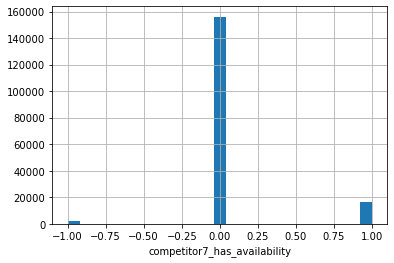

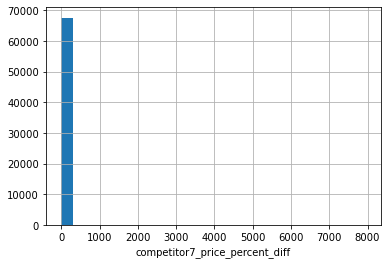

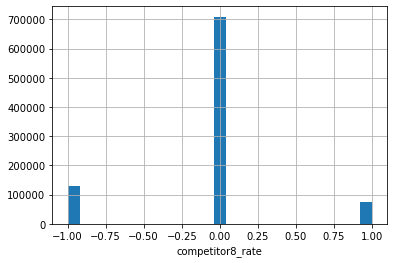

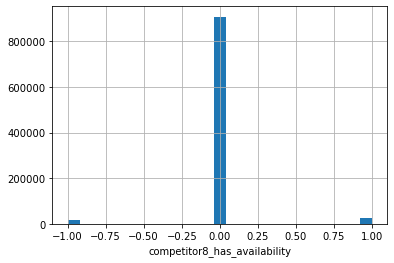

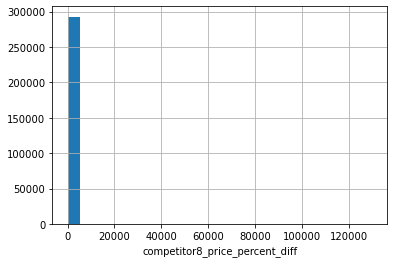

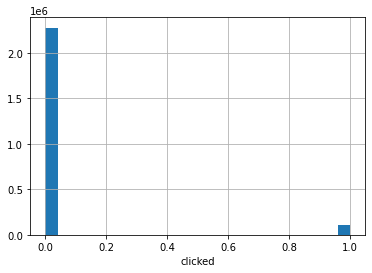

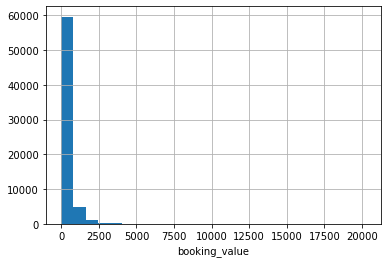

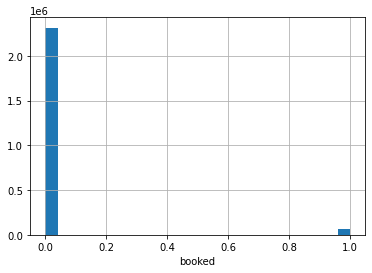

In [15]:
#checking for skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

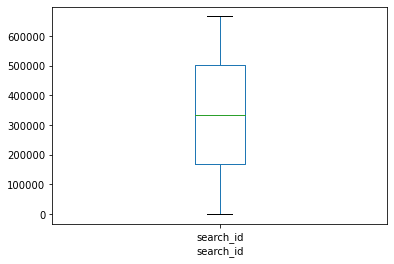

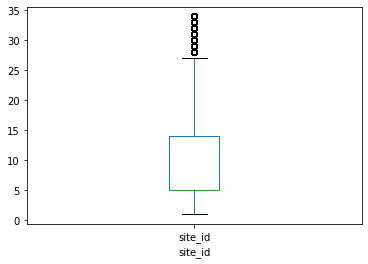

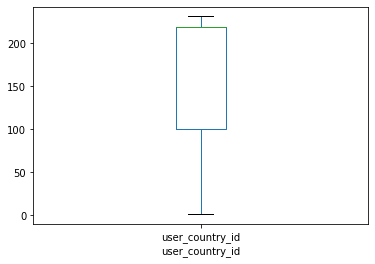

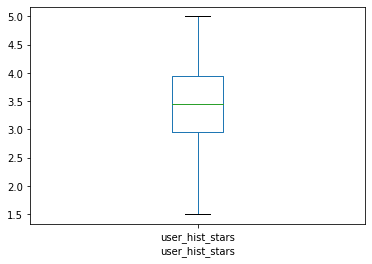

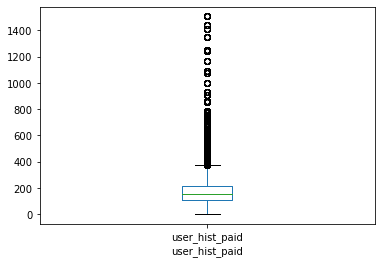

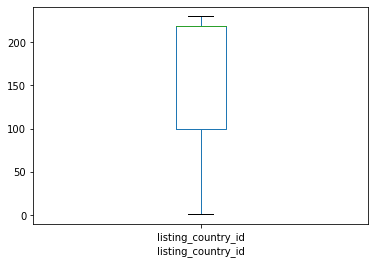

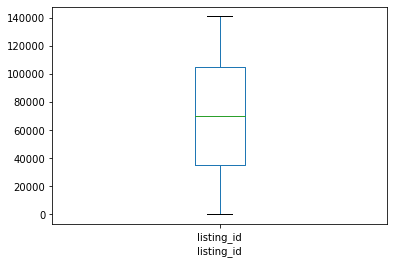

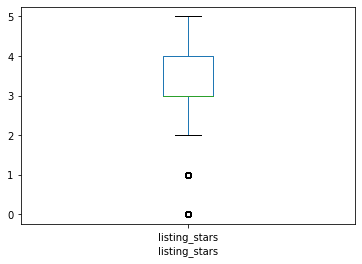

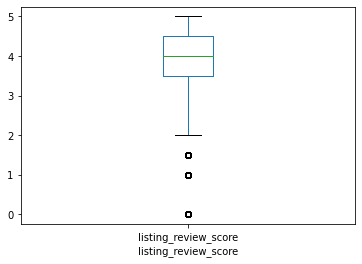

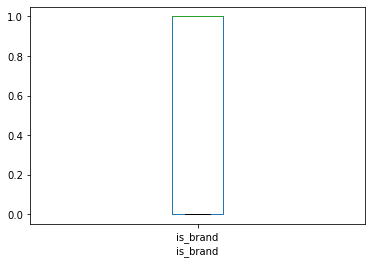

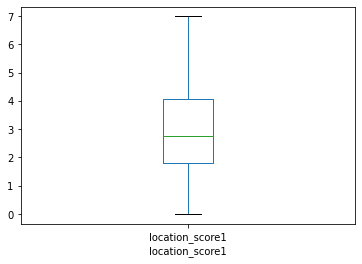

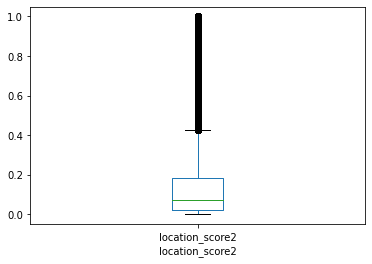

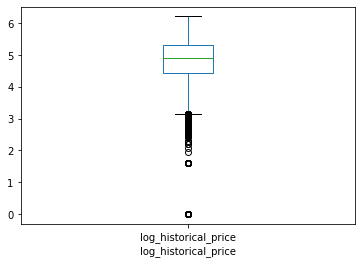

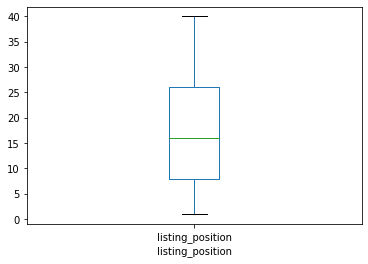

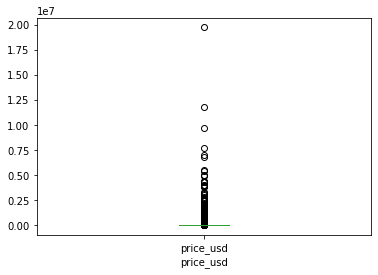

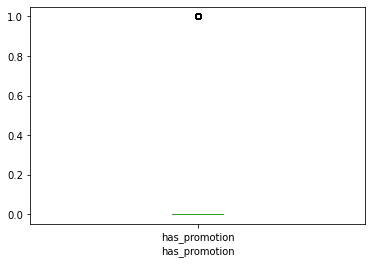

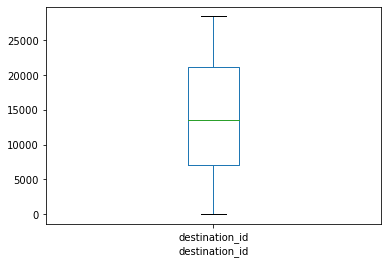

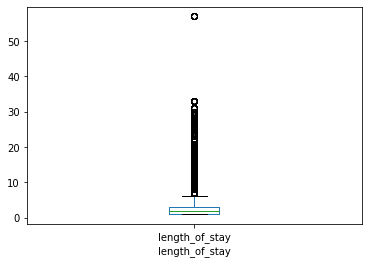

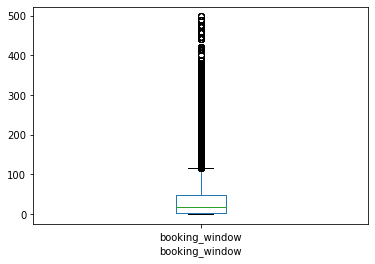

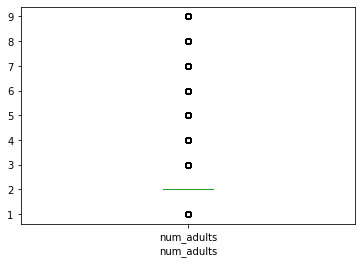

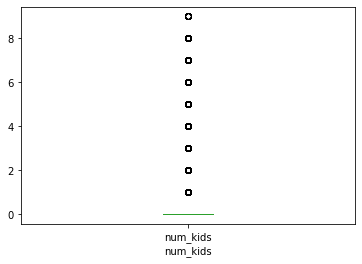

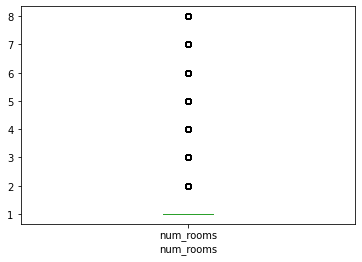

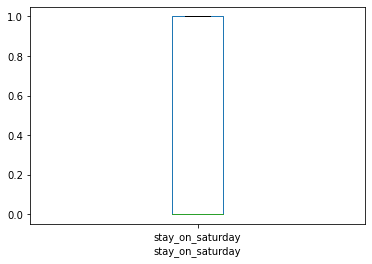

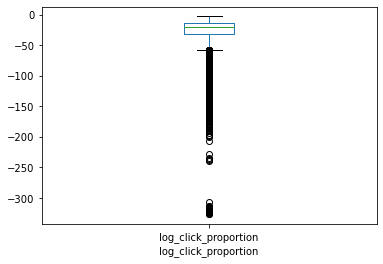

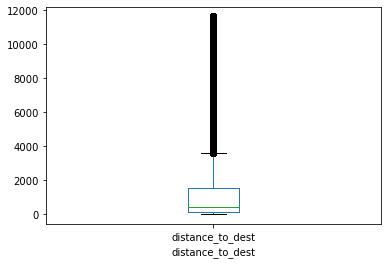

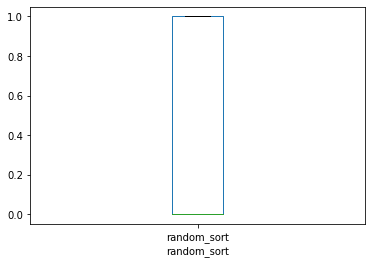

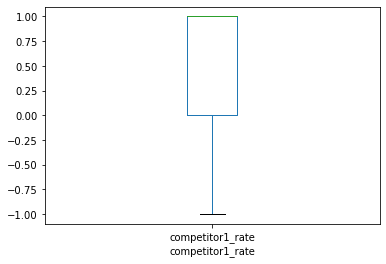

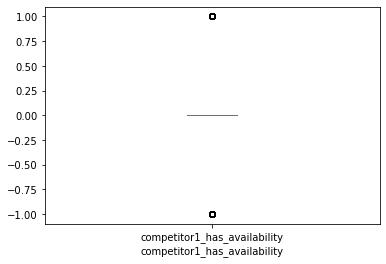

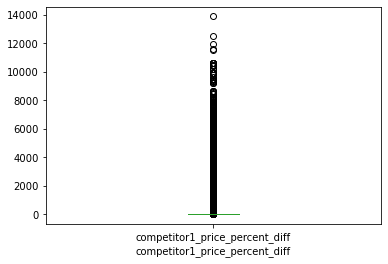

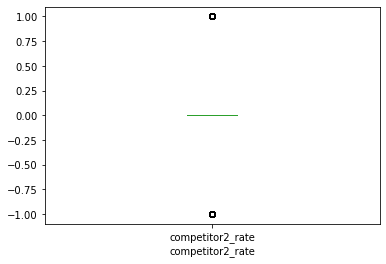

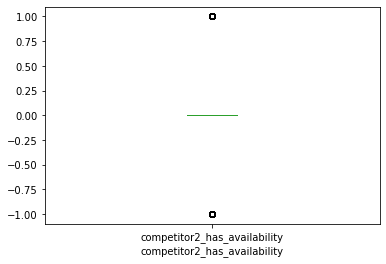

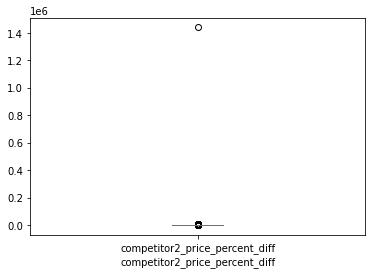

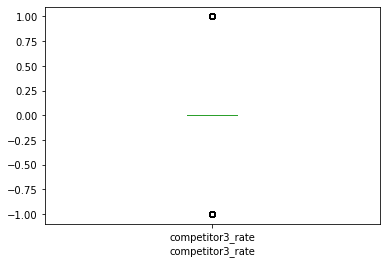

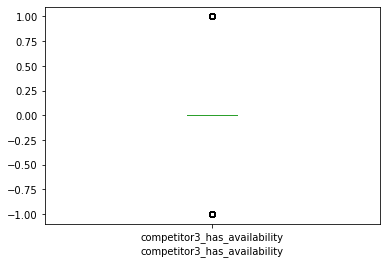

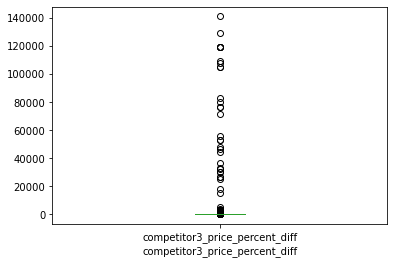

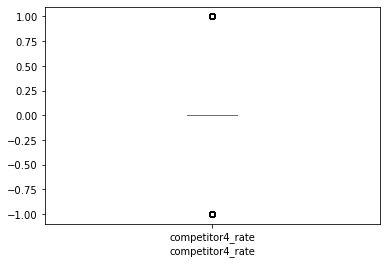

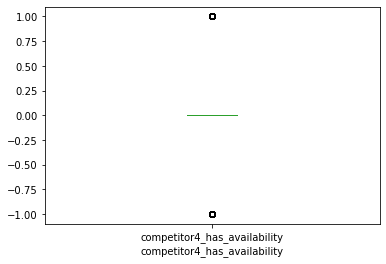

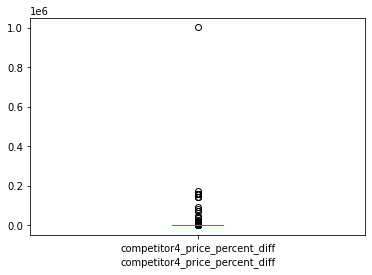

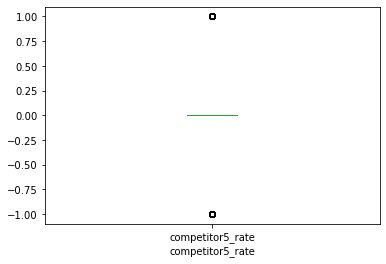

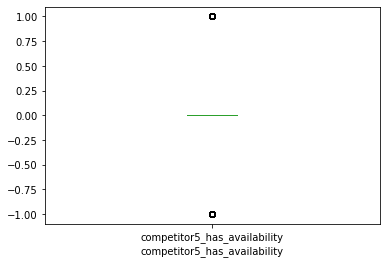

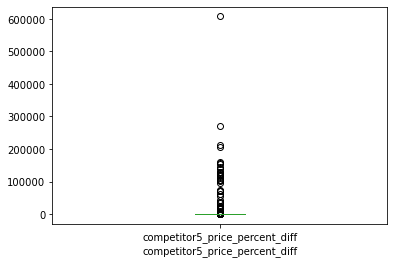

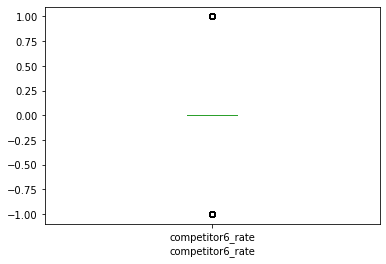

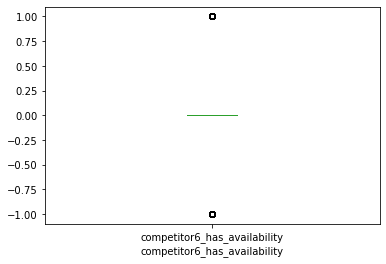

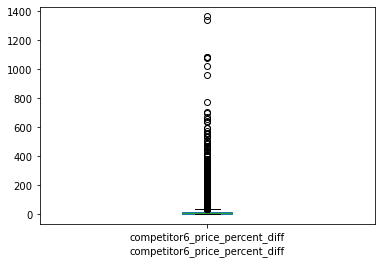

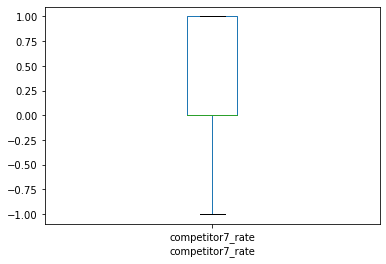

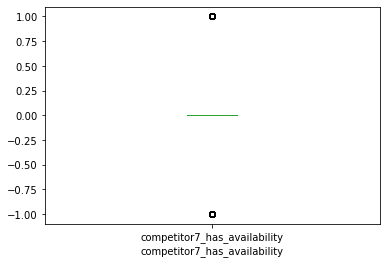

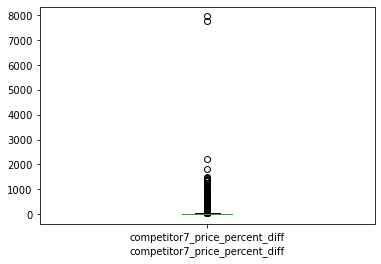

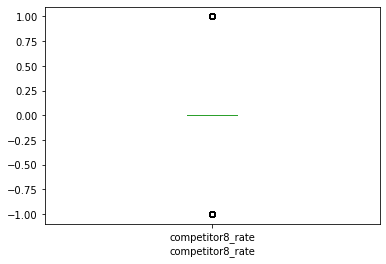

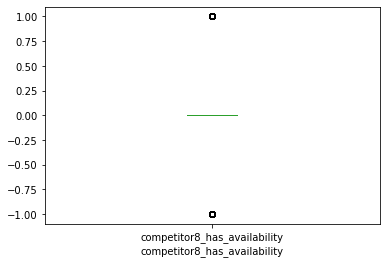

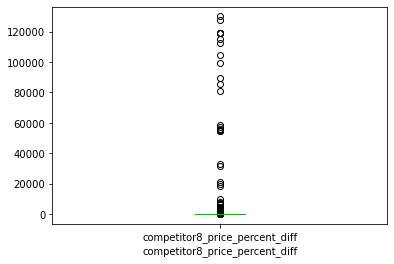

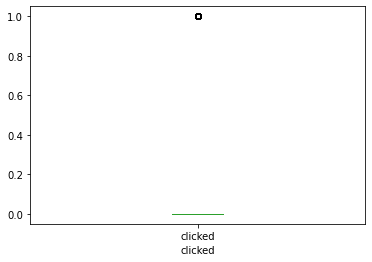

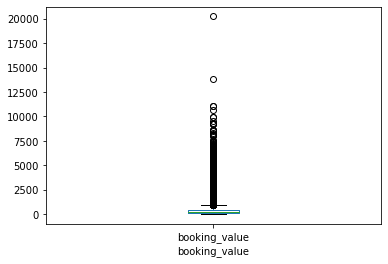

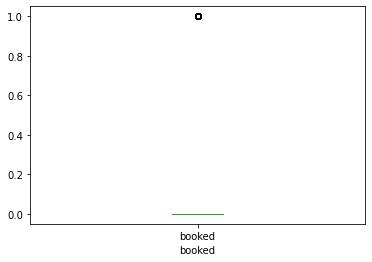

In [16]:
#checking for outliers

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

In [ ]:
#outliers are present,
#We need to traet them

# EDA manual

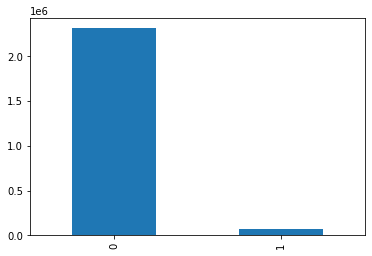

In [17]:
#checking if imbalanced dataset
df['booked'].value_counts().plot.bar()

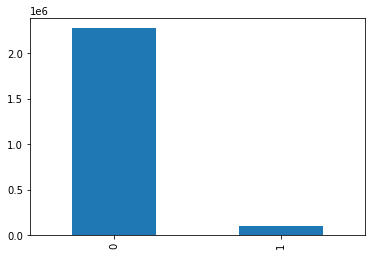

In [15]:
#checking if imbalanced dataset
df['clicked'].value_counts().plot.bar()

# EDA by sweetviz library

In [19]:
import sweetviz

In [21]:
my_report=sweetviz.analyze([df,'df'],target_feat='booked')

:FEATURES DONE:                    |█████████████████████| [100%]   01:07  -> (00:00 left)
:PAIRWISE DONE:                    |███████████████████| [100%]   1:09:30  -> (00:00 left)


Creating Associations graph... DONE!


In [22]:
my_report.show_html('OTA.html')

Report OTA.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# EDA by dtale Library

In [23]:
import dtale

In [24]:
dtale.show(df)

# c.	Perform exploratory analysis to identify any collinearities and explain which issues collinearity causes.

# Preprocessing has to be done before VIF and other points d,e,f .

# 1.Missing value treatment(Here i have replaced all the NAN with mean of respective feature)

In [14]:
df.isnull().sum()

search_id                               0
timestamp                               0
site_id                                 0
user_country_id                         0
user_hist_stars                   2257777
user_hist_paid                    2257063
listing_country_id                      0
listing_id                              0
listing_stars                           0
listing_review_score                 3486
is_brand                                0
location_score1                         0
location_score2                    525992
log_historical_price                    0
listing_position                        0
price_usd                               0
has_promotion                           0
destination_id                          0
length_of_stay                          0
booking_window                          0
num_adults                              0
num_kids                                0
num_rooms                               0
stay_on_saturday                  

In [15]:
df.head()

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
0,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,0,3.22,0.2544,5.98,21,295.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,0,2.71,NaN,5.64,36,299.0,0,12588,2,46,1,0,1,1,NaN,238.34,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,1,3.22,0.1924,6.10,22,373.0,1,12588,2,46,1,0,1,1,NaN,238.33,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,0,3.26,0.3729,5.74,4,329.0,0,12588,2,46,1,0,1,1,NaN,238.29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,0,3.09,0.2508,6.21,26,600.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [16]:
df.dtypes

search_id                           int64
timestamp                          object
site_id                             int64
user_country_id                     int64
user_hist_stars                   float64
user_hist_paid                    float64
listing_country_id                  int64
listing_id                          int64
listing_stars                       int64
listing_review_score              float64
is_brand                            int64
location_score1                   float64
location_score2                   float64
log_historical_price              float64
listing_position                    int64
price_usd                         float64
has_promotion                       int64
destination_id                      int64
length_of_stay                      int64
booking_window                      int64
num_adults                          int64
num_kids                            int64
num_rooms                           int64
stay_on_saturday                  

# Feature engineering before imputer( # 8 new features generated )

In [17]:
df['timestamp']=pd.to_datetime(df['timestamp'],format='%Y-%m-%d %H:%M:%S')

In [18]:
# 8 new features generated

new_df=pd.DataFrame({'year':df['timestamp'].dt.year,
                     'month':df['timestamp'].dt.month,
                     'day':df['timestamp'].dt.day,
                     
#                      'dayofyear':df['pdate'].dt.dayofyear,
                     'week':df['timestamp'].dt.week,           
#                     'dayofweek':df['pdate'].dt.dayofweek,
#                     'dayofweekname':df['pdate'].dt.weekday_name,
                     'hours':df['timestamp'].dt.hour,
                     'minutes':df['timestamp'].dt.minute,
                     'seconds':df['timestamp'].dt.second,
                    'quater':df['timestamp'].dt.quarter})

In [19]:
new_df.shape

(2380557, 8)

In [20]:
df=pd.concat([df,new_df],axis=1)
df.head()

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked,year,month,day,week,hours,minutes,seconds,quater
0,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,0,3.22,0.2544,5.98,21,295.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2012,12,31,1,8,59,22,4
1,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,0,2.71,NaN,5.64,36,299.0,0,12588,2,46,1,0,1,1,NaN,238.34,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2012,12,31,1,8,59,22,4
2,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,1,3.22,0.1924,6.10,22,373.0,1,12588,2,46,1,0,1,1,NaN,238.33,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2012,12,31,1,8,59,22,4
3,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,0,3.26,0.3729,5.74,4,329.0,0,12588,2,46,1,0,1,1,NaN,238.29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2012,12,31,1,8,59,22,4
4,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,0,3.09,0.2508,6.21,26,600.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2012,12,31,1,8,59,22,4


In [21]:
df.shape #old df was having 54 features,now after featuregeneration(8 features)total=54+8=62features.

(2380557, 62)

# Dropping feature('timestamp') as we have extracted our features

In [22]:
df=df.drop(['timestamp'],axis=1)#As we have extracted our required features.

# imputing by mean,median,mode

In [23]:
df.head()

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked,year,month,day,week,hours,minutes,seconds,quater
0,4,5,219,NaN,NaN,219,3625,4,4.0,0,3.22,0.2544,5.98,21,295.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2012,12,31,1,8,59,22,4
1,4,5,219,NaN,NaN,219,11622,4,4.0,0,2.71,NaN,5.64,36,299.0,0,12588,2,46,1,0,1,1,NaN,238.34,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2012,12,31,1,8,59,22,4
2,4,5,219,NaN,NaN,219,11826,5,4.5,1,3.22,0.1924,6.10,22,373.0,1,12588,2,46,1,0,1,1,NaN,238.33,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2012,12,31,1,8,59,22,4
3,4,5,219,NaN,NaN,219,22824,3,4.0,0,3.26,0.3729,5.74,4,329.0,0,12588,2,46,1,0,1,1,NaN,238.29,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2012,12,31,1,8,59,22,4
4,4,5,219,NaN,NaN,219,37581,5,4.5,0,3.09,0.2508,6.21,26,600.0,0,12588,2,46,1,0,1,1,NaN,238.35,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2012,12,31,1,8,59,22,4


In [24]:
df.isnull().sum()

search_id                0
site_id                  0
user_country_id          0
user_hist_stars    2257777
user_hist_paid     2257063
                    ...   
week                     0
hours                    0
minutes                  0
seconds                  0
quater                   0
Length: 61, dtype: int64

In [25]:
df['user_hist_stars']=df['user_hist_stars'].fillna(0)
df['user_hist_paid']=df['user_hist_paid'].fillna(0)
df['listing_review_score']=df['listing_review_score'].fillna(0)
df['location_score2']=df['location_score2'].fillna(df['location_score2'].median())#outliers #Below all meadian replacement is because of otliers inrespective feature.



In [26]:
df['location_score2']=df['location_score2'].fillna(df['location_score2'].median())

In [27]:
df['log_click_proportion']=df['log_click_proportion'].fillna(0)

In [28]:
df['distance_to_dest']=df['distance_to_dest'].fillna(0)

In [29]:

df['competitor1_rate']=df['competitor1_rate'].fillna(df['competitor1_rate'].median())
df['competitor1_has_availability']=df['competitor1_has_availability'].fillna(df['competitor1_has_availability'].median())
df['competitor1_price_percent_diff']=df['competitor1_price_percent_diff'].fillna(df['competitor1_price_percent_diff'].median())

df['competitor2_rate']=df['competitor2_rate'].fillna(df['competitor2_rate'].median())
df['competitor2_has_availability']=df['competitor2_has_availability'].fillna(df['competitor2_has_availability'].median())
df['competitor2_price_percent_diff']=df['competitor2_price_percent_diff'].fillna(df['competitor2_price_percent_diff'].median())

df['competitor3_rate']=df['competitor3_rate'].fillna(df['competitor3_rate'].median())
df['competitor3_has_availability']=df['competitor3_has_availability'].fillna(df['competitor3_has_availability'].median())
df['competitor3_price_percent_diff']=df['competitor3_price_percent_diff'].fillna(df['competitor3_price_percent_diff'].median())

df['competitor4_rate']=df['competitor4_rate'].fillna(df['competitor4_rate'].median())
df['competitor4_has_availability']=df['competitor4_has_availability'].fillna(df['competitor4_has_availability'].median())
df['competitor4_price_percent_diff']=df['competitor4_price_percent_diff'].fillna(df['competitor4_price_percent_diff'].median())

df['competitor5_rate']=df['competitor5_rate'].fillna(df['competitor5_rate'].median())
df['competitor5_has_availability']=df['competitor5_has_availability'].fillna(df['competitor5_has_availability'].median())
df['competitor5_price_percent_diff']=df['competitor5_price_percent_diff'].fillna(df['competitor5_price_percent_diff'].median())

df['competitor6_rate']=df['competitor6_rate'].fillna(df['competitor6_rate'].median())
df['competitor6_has_availability']=df['competitor6_has_availability'].fillna(df['competitor6_has_availability'].median())
df['competitor6_price_percent_diff']=df['competitor6_price_percent_diff'].fillna(df['competitor6_price_percent_diff'].median())

df['competitor7_rate']=df['competitor7_rate'].fillna(df['competitor7_rate'].median())
df['competitor7_has_availability']=df['competitor7_has_availability'].fillna(df['competitor7_has_availability'].median())
df['competitor7_price_percent_diff']=df['competitor7_price_percent_diff'].fillna(df['competitor7_price_percent_diff'].median())

df['competitor8_rate']=df['competitor8_rate'].fillna(df['competitor8_rate'].median())
df['competitor8_has_availability']=df['competitor8_has_availability'].fillna(df['competitor8_has_availability'].median())
df['competitor8_price_percent_diff']=df['competitor8_price_percent_diff'].fillna(df['competitor8_price_percent_diff'].median())

df['clicked']=df['clicked'].fillna(df['clicked'].median())
df['booking_value']=df['booking_value'].fillna(df['booking_value'].median())



In [30]:
df.isnull().sum()

search_id          0
site_id            0
user_country_id    0
user_hist_stars    0
user_hist_paid     0
                  ..
week               0
hours              0
minutes            0
seconds            0
quater             0
Length: 61, dtype: int64

In [31]:
df.describe()

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked,year,month,day,week,hours,minutes,seconds,quater
count,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06
mean,3.337016e+05,9.970224e+00,1.754588e+02,1.744726e-01,9.238870e+00,1.739159e+02,7.008190e+04,3.180607e+00,3.773881e+00,6.346880e-01,2.878558e+00,1.174146e-01,4.311779e+00,1.686763e+01,2.915203e+02,2.149237e-01,1.404642e+04,2.393825e+00,3.768373e+01,1.969876e+00,3.491460e-01,1.110318e+00,4.982662e-01,-1.558929e+00,8.899863e+02,2.967369e-01,9.872127e-01,7.418432e-04,1.443916e+01,1.770300e-02,1.679103e-02,1.238266e+01,5.168958e-03,1.922701e-02,1.244952e+01,-1.000606e-03,6.692551e-03,1.479138e+01,1.017073e-02,2.450603e-02,1.488346e+01,6.541746e-03,4.155330e-03,1.112484e+01,9.593973e-03,6.109495e-03,1.223109e+01,-2.302780e-02,3.818854e-03,1.231944e+01,4.456688e-02,2.237598e+02,2.788759e-02,2.012805e+03,5.150047e+00,1.566824e+01,2.058223e+01,1.373472e+01,2.956146e+01,2.950722e+01,2.005429e+00
std,1.923719e+05,7.667827e+00,6.585934e+01,7.646233e-01,4.659935e+01,6.832483e+01,4.060398e+04,1.052086e+00,1.058867e+00,4.815176e-01,1.536947e+00,1.440339e-01,1.842699e+00,1.042970e+01,2.288292e+04,4.107695e-01,8.117353e+03,2.062891e+00,5.211484e+01,8.580772e-01,7.276573e-01,4.200432e-01,4.999971e-01,7.226895e+00,1.778890e+03,4.568196e-01,1.290503e-01,3.655287e-02,1.615470e+02,2.858156e-01,1.548508e-01,9.335688e+02,2.538490e-01,1.725883e-01,2.841394e+02,1.439247e-01,9.214223e-02,9.484493e+02,3.483444e-01,1.864519e-01,6.032674e+02,1.290298e-01,7.241332e-02,4.281740e+00,1.519910e-01,8.876076e-02,1.073830e+01,2.922695e-01,1.287057e-01,2.807537e+02,2.063509e-01,9.206087e+01,1.646508e-01,3.964287e-01,3.487496e+00,8.670531e+00,1.509610e+01,5.395602e+00,1.730611e+01,1.731045e+01,1.079963e+00
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-3.265675e+02,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+00,-1.000000e+00,-1.000000e+0

In [32]:
df.head()

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked,year,month,day,week,hours,minutes,seconds,quater
0,4,5,219,0.0,0.0,219,3625,4,4.0,0,3.22,0.2544,5.98,21,295.0,0,12588,2,46,1,0,1,1,0.0,238.35,1,1.0,0.0,10.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0,219.185,0,2012,12,31,1,8,59,22,4
1,4,5,219,0.0,0.0,219,11622,4,4.0,0,2.71,0.0694,5.64,36,299.0,0,12588,2,46,1,0,1,1,0.0,238.34,1,1.0,0.0,10.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0,219.185,0,2012,12,31,1,8,59,22,4
2,4,5,219,0.0,0.0,219,11826,5,4.5,1,3.22,0.1924,6.10,22,373.0,1,12588,2,46,1,0,1,1,0.0,238.33,1,1.0,0.0,10.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0,219.185,0,2012,12,31,1,8,59,22,4
3,4,5,219,0.0,0.0,219,22824,3,4.0,0,3.26,0.3729,5.74,4,329.0,0,12588,2,46,1,0,1,1,0.0,238.29,1,1.0,0.0,10.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0,219.185,0,2012,12,31,1,8,59,22,4
4,4,5,219,0.0,0.0,219,37581,5,4.5,0,3.09,0.2508,6.21,26,600.0,0,12588,2,46,1,0,1,1,0.0,238.35,1,1.0,0.0,10.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0,219.185,0,2012,12,31,1,8,59,22,4


# Skewness treatment

In [33]:
#data is skewed
#so we will use two step method to remove skewness as much as possible.
#1-->log transformations
#2-->StandarScaler

In [34]:
#Removing skewness in the dataset by applying log transformations

df.skew() #we can see the data is +vely(right)skewed,hence we apply log transformation and then scale the data. 

search_id         -0.004562
site_id            1.453279
user_country_id   -1.049364
user_hist_stars    4.331498
user_hist_paid     7.684528
                     ...   
week               0.870049
hours             -0.340307
minutes           -0.001197
seconds            0.000199
quater             0.919521
Length: 61, dtype: float64

In [35]:
df['booked'].value_counts()

0    2314169
1      66388
Name: booked, dtype: int64

In [36]:
df.dtypes

search_id            int64
site_id              int64
user_country_id      int64
user_hist_stars    float64
user_hist_paid     float64
                    ...   
week                 int64
hours                int64
minutes              int64
seconds              int64
quater               int64
Length: 61, dtype: object

# Contd.....c. Perform exploratory analysis to identify any collinearities and explain which issues collinearity causes.

In [37]:
df.corr()#We can manually delete the collinear feature.

#But I have implemented the VIF technique to remove multicollinearity.

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked,year,month,day,week,hours,minutes,seconds,quater
search_id,1.000000,0.003338,-0.000633,-0.004623,-0.006364,-0.001352,-0.000353,0.000264,0.000030,-0.001236,0.001658,-0.002620,-0.001783,0.002956,-0.002613,0.001311,-0.000872,-0.000680,0.002611,0.002328,-0.003353,-0.004294,0.002088,-0.000808,0.006033,-0.001303,0.003436,-0.000930,-0.000710,0.001254,0.000485,0.000323,0.000509,0.000432,-0.000431,0.000735,0.001684,-0.001432,0.000519,0.001956,-0.001263,-0.001547,-0.001175,0.000152,-0.000220,-0.002378,0.000135,0.001090,-0.000510,0.000100,-0.000719,-0.000634,-0.000324,0.001910,-0.001708,-0.000230,-0.001670,0.002429,-0.001456,0.007143,-0.001689
site_id,0.003338,1.000000,-0.304867,0.061655,0.051041,-0.316166,0.003156,0.173546,-0.074336,-0.198551,0.179594,0.062019,0.023578,-0.031008,-0.001891,0.083838,0.020703,0.107595,0.173011,-0.019009,-0.040890,0.025075,-0.080444,0.062335,0.110779,0.023869,-0.034720,0.006952,0.017418,0.015356,-0.016971,0.001329,0.012608,0.002085,-0.000955,-0.011289,0.027842,-0.000937,-0.012200,-0.007942,-0.000106,0.025504,0.026242,0.014256,0.033099,0.029804,0.010291,0.035509,-0.014005,-0.001789,0.008371,0.013802,-0.000576,-0.009394,0.005902,-0.004873,0.005237,0.095784,0.001344,0.004329,0.008671
user_country_id,-0.000633,-0.304867,1.000000,-0.056866,-0.046239,0.475955,0.000759,-0.111548,0.063155,0.182769,-0.125767,-0.017613,-0.018009,0.017506,0.000112,-0.033014,-0.002611,-0.098039,-0.086305,0.004711,0.012882,-0.027814,0.065441,-0.061480,0.096913,-0.035113,0.052002,-0.010735,-0.028554,0.001192,0.021251,0.000398,-0.002189,0.020460,0.000873,0.005831,0.004703,0.001087,0.014602,0.006948,-0.001311,-0.042395,-0.048063,-0.026854,-0.055794,-0.062208,-0.022380,-0.033446,0.015157,0.001568,-0.004951,-0.010915,0.002178,0.008742,-0.002840,0.000172,-0.002384,-0.039083,-0.004348,0.001007,-0.005659
user_hist_stars,-0.004623,0.061655,-0.056866,1.000000,0.881546,-0.057234,0.000154,0.026480,-0.009940,-0.020462,0.013676,0.010226,0.000889,-0.007639,-0.001320,-0.002933,0.001574,-0.011121,-0.012979,-0.057466,-0.012038,0.043869,-0.046770,0.037909,0.031610,-0.069005,-0.004566,0.002951,-0.002717,0.001575,-0.001652,-0.000155,0.002990,0.000891,0.000961,-0.004706,0.005845,-0.000860,-0.002586,-0.001724,0.000887,0.006492,0.010856,0.004630,0.009383,0.010442,0.004131,0.006894,-0.002462,-0.000257,-0.000451,0.010199,0.011549,-0.004855,0.009702,-0.034908,0.007955,-0.024231,-0.004532,0.005403,0.010981
user_hist_paid,-0.006364,0.051041,-0.046239,0.881546,1.000000,-0.045805,-0.000562,0.029002,-0.002678,-0.016900,0.020029,0.011427,0.002686,-0.007743,-0.001063,-0.000673,-0.002158,-0.003382,-0.002102,-0.046106,-0.004640,0.037580,-0.041066,0.032878,0.037260,-0.057730,-0.007050,0.002656,-0.002566,0.000619,-0.000333,-0.000144,0.001013,-0.001470,0.001094,-0.003144,0.006634,-0.000747,-0.001987,-0.003267,0.001316,0.005460,0.009825,0.003654,0.008300,0.008580,0.002944,0.006068,-0.002758,-0.000170,-0.000270,0.017027,0.010002,-0.003514,0.009132,-0.028882,0.008007,-0.019912

# VIF

In [38]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
def calc_vif(X): # X-->dataframe

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [40]:
#except the target feature'label' all other features are selected.We dont want VIF wrt to target.
#X=df.iloc[columns except target'label' ]
X=df.drop(['booked'],axis=1)
#result below interprets-VIF is calculated of each variable vs all other variables.
calc_vif(X)

,variables,VIF
0,search_id,4.010230
1,site_id,1.242379
2,user_country_id,1.425844
3,user_hist_stars,4.529761
4,user_hist_paid,4.496375
5,listing_country_id,1.543458
6,listing_id,1.000257
7,listing_stars,1.305113
8,listing_review_score,1.195248
9,is_brand,1.227383


# VIF correction technique implementation

In [41]:
df2 = df.copy()
#Next, combine(subtract) the correlated variables into a new feature'new_timeextract_1'and drop the others.
#This will reduce the multicollinearity:
df2['new_timeextract_1'] = df.apply(lambda x: x['year'] - x['month'],axis=1)
df2['new_timeextract2_2'] = df.apply(lambda x: x['week'] - x['quater'],axis=1)


X = df2.drop(['year','month','week','quater','booked'],axis=1)
                                            #In VIF alwayz exclude the target feature.
#Dropping variables should be an iterative process starting with the variable having the largest VIF value.(Here highest('user_hist_stars') to lowest('booked'))
#because its trend is highly captured by other variables. 
#If you do this, you will notice that VIF values for other variables would have reduced too, although to a varying extent.




In [42]:
calc_vif(X)#Checking values after applying vif

,variables,VIF
0,search_id,4.010227
1,site_id,3.342557
2,user_country_id,11.545204
3,user_hist_stars,4.765362
4,user_hist_paid,4.672967
5,listing_country_id,11.543662
6,listing_id,3.980045
7,listing_stars,13.205890
8,listing_review_score,16.364840
9,is_brand,3.359772


In [43]:
df2.head()

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked,year,month,day,week,hours,minutes,seconds,quater,new_timeextract_1,new_timeextract2_2
0,4,5,219,0.0,0.0,219,3625,4,4.0,0,3.22,0.2544,5.98,21,295.0,0,12588,2,46,1,0,1,1,0.0,238.35,1,1.0,0.0,10.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0,219.185,0,2012,12,31,1,8,59,22,4,2000.0,-3.0
1,4,5,219,0.0,0.0,219,11622,4,4.0,0,2.71,0.0694,5.64,36,299.0,0,12588,2,46,1,0,1,1,0.0,238.34,1,1.0,0.0,10.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0,219.185,0,2012,12,31,1,8,59,22,4,2000.0,-3.0
2,4,5,219,0.0,0.0,219,11826,5,4.5,1,3.22,0.1924,6.10,22,373.0,1,12588,2,46,1,0,1,1,0.0,238.33,1,1.0,0.0,10.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0,219.185,0,2012,12,31,1,8,59,22,4,2000.0,-3.0
3,4,5,219,0.0,0.0,219,22824,3,4.0,0,3.26,0.3729,5.74,4,329.0,0,12588,2,46,1,0,1,1,0.0,238.29,1,1.0,0.0,10.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0,219.185,0,2012,12,31,1,8,59,22,4,2000.0,-3.0
4,4,5,219,0.0,0.0,219,37581,5,4.5,0,3.09,0.2508,6.21,26,600.0,0,12588,2,46,1,0,1,1,0.0,238.35,1,1.0,0.0,10.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0,219.185,0,2012,12,31,1,8,59,22,4,2000.0,-3.0


In [44]:
df2.shape

(2380557, 63)

# Dropping features as we have extracted and made our new VIF feature

In [45]:
#Copy the features from top,except the target feature.
df2 = df2.drop(['year','month','week','quater'],axis=1)

In [46]:
df2.shape

(2380557, 59)

In [47]:
df2.head()

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked,day,hours,minutes,seconds,new_timeextract_1,new_timeextract2_2
0,4,5,219,0.0,0.0,219,3625,4,4.0,0,3.22,0.2544,5.98,21,295.0,0,12588,2,46,1,0,1,1,0.0,238.35,1,1.0,0.0,10.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0,219.185,0,31,8,59,22,2000.0,-3.0
1,4,5,219,0.0,0.0,219,11622,4,4.0,0,2.71,0.0694,5.64,36,299.0,0,12588,2,46,1,0,1,1,0.0,238.34,1,1.0,0.0,10.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0,219.185,0,31,8,59,22,2000.0,-3.0
2,4,5,219,0.0,0.0,219,11826,5,4.5,1,3.22,0.1924,6.10,22,373.0,1,12588,2,46,1,0,1,1,0.0,238.33,1,1.0,0.0,10.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0,219.185,0,31,8,59,22,2000.0,-3.0
3,4,5,219,0.0,0.0,219,22824,3,4.0,0,3.26,0.3729,5.74,4,329.0,0,12588,2,46,1,0,1,1,0.0,238.29,1,1.0,0.0,10.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0,219.185,0,31,8,59,22,2000.0,-3.0
4,4,5,219,0.0,0.0,219,37581,5,4.5,0,3.09,0.2508,6.21,26,600.0,0,12588,2,46,1,0,1,1,0.0,238.35,1,1.0,0.0,10.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0.0,0.0,12.0,0.0,0.0,11.0,0,219.185,0,31,8,59,22,2000.0,-3.0


In [48]:
df2.describe()  #Negative values have to treated --adding constant greater than the minimum value in the dataset,and then take log.
#this creates problem when applying PCA.                                            new_timeextract2_2->(-2.019072e+04=20190.72)
#I have treated the -ve values in PCA section below.

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked,day,hours,minutes,seconds,new_timeextract_1,new_timeextract2_2
count,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06,2.380557e+06
mean,3.337016e+05,9.970224e+00,1.754588e+02,1.744726e-01,9.238870e+00,1.739159e+02,7.008190e+04,3.180607e+00,3.773881e+00,6.346880e-01,2.878558e+00,1.174146e-01,4.311779e+00,1.686763e+01,2.915203e+02,2.149237e-01,1.404642e+04,2.393825e+00,3.768373e+01,1.969876e+00,3.491460e-01,1.110318e+00,4.982662e-01,-1.558929e+00,8.899863e+02,2.967369e-01,9.872127e-01,7.418432e-04,1.443916e+01,1.770300e-02,1.679103e-02,1.238266e+01,5.168958e-03,1.922701e-02,1.244952e+01,-1.000606e-03,6.692551e-03,1.479138e+01,1.017073e-02,2.450603e-02,1.488346e+01,6.541746e-03,4.155330e-03,1.112484e+01,9.593973e-03,6.109495e-03,1.223109e+01,-2.302780e-02,3.818854e-03,1.231944e+01,4.456688e-02,2.237598e+02,2.788759e-02,1.566824e+01,1.373472e+01,2.956146e+01,2.950722e+01,2.007655e+03,1.857680e+01
std,1.923719e+05,7.667827e+00,6.585934e+01,7.646233e-01,4.659935e+01,6.832483e+01,4.060398e+04,1.052086e+00,1.058867e+00,4.815176e-01,1.536947e+00,1.440339e-01,1.842699e+00,1.042970e+01,2.288292e+04,4.107695e-01,8.117353e+03,2.062891e+00,5.211484e+01,8.580772e-01,7.276573e-01,4.200432e-01,4.999971e-01,7.226895e+00,1.778890e+03,4.568196e-01,1.290503e-01,3.655287e-02,1.615470e+02,2.858156e-01,1.548508e-01,9.335688e+02,2.538490e-01,1.725883e-01,2.841394e+02,1.439247e-01,9.214223e-02,9.484493e+02,3.483444e-01,1.864519e-01,6.032674e+02,1.290298e-01,7.241332e-02,4.281740e+00,1.519910e-01,8.876076e-02,1.073830e+01,2.922695e-01,1.287057e-01,2.807537e+02,2.063509e-01,9.206087e+01,1.646508e-01,8.670531e+00,5.395602e+00,1.730611e+01,1.731045e+01,3.846671e+00,1.406399e+01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-3.265675e+02,0.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+00,-1.000000e+00,-1.000000e+00,2.000000e+00,-1.00000

In [58]:
df2.dtypes

search_id                           int64
site_id                             int64
user_country_id                     int64
user_hist_stars                   float64
user_hist_paid                    float64
listing_country_id                  int64
listing_id                          int64
listing_stars                       int64
listing_review_score              float64
is_brand                            int64
location_score1                   float64
location_score2                   float64
log_historical_price              float64
listing_position                    int64
price_usd                         float64
has_promotion                       int64
destination_id                      int64
length_of_stay                      int64
booking_window                      int64
num_adults                          int64
num_kids                            int64
num_rooms                           int64
stay_on_saturday                    int64
log_click_proportion              

# -ve value treatment technique(new_timeextract2_2-->(-2.019072e+04 ))-->(-20190.72),,So we are taking a +ve value > 20190.72 in counter.

# Adding a constant 21000 to all the numerical columns and taking log 

In [59]:
df2.columns

Index(['search_id', 'site_id', 'user_country_id', 'user_hist_stars',
       'user_hist_paid', 'listing_country_id', 'listing_id', 'listing_stars',
       'listing_review_score', 'is_brand', 'location_score1',
       'location_score2', 'log_historical_price', 'listing_position',
       'price_usd', 'has_promotion', 'destination_id', 'length_of_stay',
       'booking_window', 'num_adults', 'num_kids', 'num_rooms',
       'stay_on_saturday', 'log_click_proportion', 'distance_to_dest',
       'random_sort', 'competitor1_rate', 'competitor1_has_availability',
       'competitor1_price_percent_diff', 'competitor2_rate',
       'competitor2_has_availability', 'competitor2_price_percent_diff',
       'competitor3_rate', 'competitor3_has_availability',
       'competitor3_price_percent_diff', 'competitor4_rate',
       'competitor4_has_availability', 'competitor4_price_percent_diff',
       'competitor5_rate', 'competitor5_has_availability',
       'competitor5_price_percent_diff', 'competitor6

In [63]:
num_col=['search_id', 'site_id', 'user_country_id', 'user_hist_stars',
       'user_hist_paid', 'listing_country_id', 'listing_id', 'listing_stars',
       'listing_review_score', 'is_brand', 'location_score1',
       'location_score2', 'log_historical_price', 'listing_position',
       'price_usd', 'has_promotion', 'destination_id', 'length_of_stay',
       'booking_window', 'num_adults', 'num_kids', 'num_rooms',
       'stay_on_saturday', 'log_click_proportion', 'distance_to_dest',
       'random_sort', 'competitor1_rate', 'competitor1_has_availability',
       'competitor1_price_percent_diff', 'competitor2_rate',
       'competitor2_has_availability', 'competitor2_price_percent_diff',
       'competitor3_rate', 'competitor3_has_availability',
       'competitor3_price_percent_diff', 'competitor4_rate',
       'competitor4_has_availability', 'competitor4_price_percent_diff',
       'competitor5_rate', 'competitor5_has_availability',
       'competitor5_price_percent_diff', 'competitor6_rate',
       'competitor6_has_availability', 'competitor6_price_percent_diff',
       'competitor7_rate', 'competitor7_has_availability',
       'competitor7_price_percent_diff', 'competitor8_rate',
       'competitor8_has_availability', 'competitor8_price_percent_diff',
       'clicked', 'booking_value', 'day', 'hours', 'minutes',
       'seconds', 'new_timeextract_1', 'new_timeextract2_2']

In [64]:
len(num_col)

58

In [65]:
#log transformation to counter -ve values in the dataset
for i in num_col:
    df2[i]=np.log(df2[i]+21000)#directly 21000 to counter the min value -20190 in 'new_timeextract2_2'
    
    
    #no negative value present in dataset after this function is applied,and log will normalize the distribution of data.
    

In [66]:
df2.head()

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked,day,hours,minutes,seconds,new_timeextract_1,new_timeextract2_2
0,9.952468,9.952516,9.962652,9.952278,9.952278,9.962652,10.111517,9.952468,9.952468,9.952278,9.952431,9.952290,9.952562,9.953277,9.966228,9.952278,10.421924,9.952373,9.954466,9.952325,9.952278,9.952325,9.952325,9.952278,9.963564,9.952325,9.952325,9.952278,9.952754,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.962661,0,9.953753,9.952659,9.955083,9.953325,10.043249,9.952135
1,9.952468,9.952516,9.962652,9.952278,9.952278,9.962652,10.392742,9.952468,9.952468,9.952278,9.952407,9.952281,9.952546,9.953991,9.966415,9.952278,10.421924,9.952373,9.954466,9.952325,9.952278,9.952325,9.952325,9.952278,9.963563,9.952325,9.952325,9.952278,9.952754,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.962661,0,9.953753,9.952659,9.955083,9.953325,10.043249,9.952135
2,9.952468,9.952516,9.962652,9.952278,9.952278,9.962652,10.398976,9.952516,9.952492,9.952325,9.952431,9.952287,9.952568,9.953325,9.969884,9.952325,10.421924,9.952373,9.954466,9.952325,9.952278,9.952325,9.952325,9.952278,9.963563,9.952325,9.952325,9.952278,9.952754,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.962661,0,9.953753,9.952659,9.955083,9.953325,10.043249,9.952135
3,9.952468,9.952516,9.962652,9.952278,9.952278,9.962652,10.687937,9.952421,9.952468,9.952278,9.952433,9.952295,9.952551,9.952468,9.967823,9.952278,10.421924,9.952373,9.954466,9.952325,9.952278,9.952325,9.952325,9.952278,9.963561,9.952325,9.952325,9.952278,9.952754,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.962661,0,9.953753,9.952659,9.955083,9.953325,10.043249,9.952135
4,9.952468,9.952516,9.962652,9.952278,9.952278,9.962652,10.978166,9.952516,9.952492,9.952278,9.952425,9.952290,9.952573,9.953515,9.980449,9.952278,10.421924,9.952373,9.954466,9.952325,9.952278,9.952325,9.952325,9.952278,9.963564,9.952325,9.952325,9.952278,9.952754,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.962661,0,9.953753,9.952659,9.955083,9.953325,10.043249,9.952135


# Segregating target('booked') and independent features

In [67]:
y=df2[['booked']]
x=df2.drop(['booked'],axis=1)

In [68]:
x.head()

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,day,hours,minutes,seconds,new_timeextract_1,new_timeextract2_2
0,9.952468,9.952516,9.962652,9.952278,9.952278,9.962652,10.111517,9.952468,9.952468,9.952278,9.952431,9.952290,9.952562,9.953277,9.966228,9.952278,10.421924,9.952373,9.954466,9.952325,9.952278,9.952325,9.952325,9.952278,9.963564,9.952325,9.952325,9.952278,9.952754,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.962661,9.953753,9.952659,9.955083,9.953325,10.043249,9.952135
1,9.952468,9.952516,9.962652,9.952278,9.952278,9.962652,10.392742,9.952468,9.952468,9.952278,9.952407,9.952281,9.952546,9.953991,9.966415,9.952278,10.421924,9.952373,9.954466,9.952325,9.952278,9.952325,9.952325,9.952278,9.963563,9.952325,9.952325,9.952278,9.952754,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.962661,9.953753,9.952659,9.955083,9.953325,10.043249,9.952135
2,9.952468,9.952516,9.962652,9.952278,9.952278,9.962652,10.398976,9.952516,9.952492,9.952325,9.952431,9.952287,9.952568,9.953325,9.969884,9.952325,10.421924,9.952373,9.954466,9.952325,9.952278,9.952325,9.952325,9.952278,9.963563,9.952325,9.952325,9.952278,9.952754,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.962661,9.953753,9.952659,9.955083,9.953325,10.043249,9.952135
3,9.952468,9.952516,9.962652,9.952278,9.952278,9.962652,10.687937,9.952421,9.952468,9.952278,9.952433,9.952295,9.952551,9.952468,9.967823,9.952278,10.421924,9.952373,9.954466,9.952325,9.952278,9.952325,9.952325,9.952278,9.963561,9.952325,9.952325,9.952278,9.952754,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.962661,9.953753,9.952659,9.955083,9.953325,10.043249,9.952135
4,9.952468,9.952516,9.962652,9.952278,9.952278,9.962652,10.978166,9.952516,9.952492,9.952278,9.952425,9.952290,9.952573,9.953515,9.980449,9.952278,10.421924,9.952373,9.954466,9.952325,9.952278,9.952325,9.952325,9.952278,9.963564,9.952325,9.952325,9.952278,9.952754,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.962661,9.953753,9.952659,9.955083,9.953325,10.043249,9.952135


In [69]:
y.head()

,booked
0,0
1,0
2,0
3,0
4,0



# Oversampling data balancing technique

In [70]:
df['booked'].value_counts()

0    2314169
1      66388
Name: booked, dtype: int64

In [71]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=42)

In [72]:
x_ovrsampled,y_oversampled=ros.fit_sample(x,y)

In [73]:
x.shape,x_ovrsampled.shape

((2380557, 58), (4628338, 58))

In [74]:
y.shape,y_oversampled.shape

((2380557, 1), (4628338, 1))

In [75]:
x_ovrsampled.shape[0]-x.shape[0] #Exta rows added due to oversampling technique.

2247781

In [76]:
df['booked'].value_counts()

0    2314169
1      66388
Name: booked, dtype: int64

In [77]:
y_oversampled['booked'].value_counts()

1    2314169
0    2314169
Name: booked, dtype: int64

In [78]:
x_ovrsampled.head()

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,day,hours,minutes,seconds,new_timeextract_1,new_timeextract2_2
0,9.952468,9.952516,9.962652,9.952278,9.952278,9.962652,10.111517,9.952468,9.952468,9.952278,9.952431,9.952290,9.952562,9.953277,9.966228,9.952278,10.421924,9.952373,9.954466,9.952325,9.952278,9.952325,9.952325,9.952278,9.963564,9.952325,9.952325,9.952278,9.952754,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.962661,9.953753,9.952659,9.955083,9.953325,10.043249,9.952135
1,9.952468,9.952516,9.962652,9.952278,9.952278,9.962652,10.392742,9.952468,9.952468,9.952278,9.952407,9.952281,9.952546,9.953991,9.966415,9.952278,10.421924,9.952373,9.954466,9.952325,9.952278,9.952325,9.952325,9.952278,9.963563,9.952325,9.952325,9.952278,9.952754,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.962661,9.953753,9.952659,9.955083,9.953325,10.043249,9.952135
2,9.952468,9.952516,9.962652,9.952278,9.952278,9.962652,10.398976,9.952516,9.952492,9.952325,9.952431,9.952287,9.952568,9.953325,9.969884,9.952325,10.421924,9.952373,9.954466,9.952325,9.952278,9.952325,9.952325,9.952278,9.963563,9.952325,9.952325,9.952278,9.952754,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.962661,9.953753,9.952659,9.955083,9.953325,10.043249,9.952135
3,9.952468,9.952516,9.962652,9.952278,9.952278,9.962652,10.687937,9.952421,9.952468,9.952278,9.952433,9.952295,9.952551,9.952468,9.967823,9.952278,10.421924,9.952373,9.954466,9.952325,9.952278,9.952325,9.952325,9.952278,9.963561,9.952325,9.952325,9.952278,9.952754,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.962661,9.953753,9.952659,9.955083,9.953325,10.043249,9.952135
4,9.952468,9.952516,9.962652,9.952278,9.952278,9.962652,10.978166,9.952516,9.952492,9.952278,9.952425,9.952290,9.952573,9.953515,9.980449,9.952278,10.421924,9.952373,9.954466,9.952325,9.952278,9.952325,9.952325,9.952278,9.963564,9.952325,9.952325,9.952278,9.952754,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.952278,9.952849,9.952278,9.952278,9.952801,9.952278,9.962661,9.953753,9.952659,9.955083,9.953325,10.043249,9.952135


# Removing skewness by taking power transformation method

In [79]:
x_ovrsampled.skew()

search_id                           -1.137360
site_id                              1.452067
user_country_id                     -1.063106
user_hist_stars                      4.004770
user_hist_paid                       7.009313
listing_country_id                  -1.070217
listing_id                          -0.678083
listing_stars                       -0.699783
listing_review_score                -2.503705
is_brand                            -0.621376
location_score1                      0.160759
location_score2                      2.002456
log_historical_price                -1.749610
listing_position                     0.698503
price_usd                           75.669947
has_promotion                        1.105524
destination_id                      -0.213550
length_of_stay                       3.565807
booking_window                       2.525033
num_adults                           2.279242
num_kids                             2.436233
num_rooms                         

In [80]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
df_power=pt.fit_transform(x_ovrsampled)
x=pd.DataFrame(df_power,columns=x_ovrsampled.columns)



In [81]:
x_ovrsampled.skew()#more work to be done,may be some other method to research.

search_id                           -1.137360
site_id                              1.452067
user_country_id                     -1.063106
user_hist_stars                      4.004770
user_hist_paid                       7.009313
listing_country_id                  -1.070217
listing_id                          -0.678083
listing_stars                       -0.699783
listing_review_score                -2.503705
is_brand                            -0.621376
location_score1                      0.160759
location_score2                      2.002456
log_historical_price                -1.749610
listing_position                     0.698503
price_usd                           75.669947
has_promotion                        1.105524
destination_id                      -0.213550
length_of_stay                       3.565807
booking_window                       2.525033
num_adults                           2.279242
num_kids                             2.436233
num_rooms                         

# Scaling the Data

In [82]:
#Applying Standard scalar to independent variable only,We dont want our binary targets to be scaled.
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(x_ovrsampled)
x=pd.DataFrame(data=X_scaled,columns=x_ovrsampled.columns)


In [62]:
x.skew()

search_id                           -1.137360
site_id                              1.452063
listing_id                          -0.678083
is_brand                            -0.621352
location_score1                      0.160761
location_score2                      1.952038
log_historical_price                -1.749607
listing_position                     0.698502
price_usd                           75.669947
has_promotion                        1.105583
destination_id                      -0.213550
length_of_stay                       3.565806
booking_window                       2.525033
num_adults                           2.279258
num_kids                             2.436274
stay_on_saturday                    -0.026427
distance_to_dest                     2.547362
random_sort                          1.663353
competitor1_has_availability        12.594935
competitor1_price_percent_diff      37.261746
competitor2_rate                     0.512352
competitor2_has_availability      

In [83]:
x.head()

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,day,hours,minutes,seconds,new_timeextract_1,new_timeextract2_2
0,-3.349342,-0.646451,0.656985,-0.245036,-0.213316,0.659526,-2.208802,0.749555,0.155065,-1.357824,0.235849,0.649520,0.910018,0.823972,0.145195,-0.589828,-0.061725,-0.13134,0.228965,-1.101461,-0.488517,-0.276709,0.986874,0.225825,-0.366954,2.132324,0.095975,-0.019196,-0.027591,-0.09004,-0.106499,-0.021339,-0.046481,-0.099727,-0.011644,-0.008152,-0.072741,-0.006851,-0.068462,-0.127795,-0.013983,-0.059448,-0.057873,-0.035077,-0.073608,-0.067765,-0.02948,0.035698,-0.031512,-0.010129,-1.017308,-0.221273,1.7658,-1.062408,1.701521,-0.432764,-1.985591,-1.543994
1,-3.349342,-0.646451,0.656985,-0.245036,-0.213316,0.659526,-1.683548,0.749555,0.155065,-1.357824,-0.101737,-0.464754,0.724693,2.264678,0.149501,-0.589828,-0.061725,-0.13134,0.228965,-1.101461,-0.488517,-0.276709,0.986874,0.225825,-0.366960,2.132324,0.095975,-0.019196,-0.027591,-0.09004,-0.106499,-0.021339,-0.046481,-0.099727,-0.011644,-0.008152,-0.072741,-0.006851,-0.068462,-0.127795,-0.013983,-0.059448,-0.057873,-0.035077,-0.073608,-0.067765,-0.02948,0.035698,-0.031512,-0.010129,-1.017308,-0.221273,1.7658,-1.062408,1.701521,-0.432764,-1.985591,-1.543994
2,-3.349342,-0.646451,0.656985,-0.245036,-0.213316,0.659526,-1.671904,1.745254,0.680441,0.736472,0.235849,0.276089,0.975426,0.920051,0.229008,1.695410,-0.061725,-0.13134,0.228965,-1.101461,-0.488517,-0.276709,0.986874,0.225825,-0.366967,2.132324,0.095975,-0.019196,-0.027591,-0.09004,-0.106499,-0.021339,-0.046481,-0.099727,-0.011644,-0.008152,-0.072741,-0.006851,-0.068462,-0.127795,-0.013983,-0.059448,-0.057873,-0.035077,-0.073608,-0.067765,-0.02948,0.035698,-0.031512,-0.010129,-1.017308,-0.221273,1.7658,-1.062408,1.701521,-0.432764,-1.985591,-1.543994
3,-3.349342,-0.646451,0.656985,-0.245036,-0.213316,0.659526,-1.132201,-0.246192,0.155065,-1.357824,0.262326,1.363253,0.779201,-0.810071,0.181766,-0.589828,-0.061725,-0.13134,0.228965,-1.101461,-0.488517,-0.276709,0.986874,0.225825,-0.366993,2.132324,0.095975,-0.019196,-0.027591,-0.09004,-0.106499,-0.021339,-0.046481,-0.099727,-0.011644,-0.008152,-0.072741,-0.006851,-0.068462,-0.127795,-0.013983,-0.059448,-0.057873,-0.035077,-0.073608,-0.067765,-0.02948,0.035698,-0.031512,-0.010129,-1.017308,-0.221273,1.7658,-1.062408,1.701521,-0.432764,-1.985591,-1.543994
4,-3.349342,-0.646451,0.656985,-0.245036,-0.213316,0.659526,-0.590129,1.745254,0.680441,-1.357824,0.149798,0.627837,1.035383,1.304321,0.471195,-0.589828,-0.061725,-0.13134,0.228965,-1.101461,-0.488517,-0.276709,0.986874,0.225825,-0.366954,2.132324,0.095975,-0.019196,-0.027591,-0.09004,-0.106499,-0.021339,-0.046481,-0.099727,-0.011644,-0.008152,-0.072741,-0.006851,-0.068462,-0.127795,-0.013983,-0.059448,-0.057873,-0.035077,-0.073608,-0.067765,-0.02948,0.035698,-0.031512,-0.010129,-1.017308,-0.221273,1.7658,-1.062408,1.701521,-0.432764,-1.985591,-1.543994


# PCA

In [84]:
#In this Bartlett ’s test, the p-value is 0. 
#The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.
#This value indicates that you can proceed with your planned factor analysis.

In [85]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(x)
chi_square_value, p_value

(42270984.15107892, 0.0)

In [86]:
#Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
#It determines the adequacy for each observed variable and for the complete model.
#KMO estimates the proportion of variance among all the observed variable.
#Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. 
#Value of KMO less than 0.6 is considered inadequate.

In [87]:

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(x)
kmo_model

0.574452157530086

In [68]:
#The overall KMO for our data is 0.57, which is ok. 
#This value indicates that you can proceed with your planned factor analysis.


In [88]:
x.shape

(4628338, 58)

In [89]:
x1=x.copy()
from sklearn.decomposition import PCA
pca=PCA(n_components=49)#taking all column for PCA,process  of graph technique to find best n_components.
df_pca58=pca.fit_transform(x1)
x1=pd.DataFrame(df_pca58)

In [90]:
x1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,-0.583460,-0.661767,-0.652008,0.555712,-0.589054,-0.334492,-0.031065,-0.661929,-0.813456,1.260796,-0.920625,0.521549,0.916694,0.173425,-1.760646,1.082747,-0.279947,-0.436050,-0.857433,-2.424475,1.518219,0.268489,0.979999,0.653600,-1.283736,-1.761375,1.550703,1.328347,0.618287,0.401490,0.012876,-1.340990,-0.002324,-0.597096,-0.671153,0.226177,-0.422198,0.622390,0.160090,0.058836,-0.908105,-0.060710,-0.294214,-0.012255,0.026183,-1.136526,0.279578,0.153259,0.014187
1,-1.020210,-1.201905,-1.084423,0.835691,-0.651566,-0.854953,-0.458876,-0.762410,-0.542272,1.534865,-1.106278,0.486187,0.365967,0.359520,-1.464680,1.069158,-0.339802,-0.589658,-0.318590,-2.294906,1.520284,0.046224,1.211209,0.445564,-1.147820,-1.580008,1.475274,1.155706,0.030240,0.203066,-0.168368,-1.235141,-0.050348,-0.594562,-0.638047,0.171762,-0.337909,0.898532,0.450711,-0.050070,-0.858493,0.092927,-0.352196,-0.048088,0.092700,-1.253200,0.291120,0.149255,0.018940
2,-0.366937,-0.068514,-0.126378,0.360300,-0.645023,0.201804,-0.222972,-0.802351,-0.795056,2.264227,-1.671542,0.741009,0.015097,0.465399,-1.404816,1.061482,-0.552667,-0.148749,-0.529068,-2.017797,1.453482,0.265605,1.478422,0.512621,-1.389964,-1.559461,1.687197,1.065962,0.149739,0.255718,-1.019660,-1.476849,0.598292,0.288462,-0.991801,0.692914,-0.665760,0.409821,0.031185,0.009416,-0.101886,-0.459952,0.263303,0.157349,-0.553851,0.218031,0.074248,0.385450,0.023695
3,-0.622485,-0.206263,-0.334644,0.304354,-0.473229,-0.070338,0.301303,-0.380631,-0.954710,0.653649,-0.347805,0.244351,1.310919,-0.016602,-1.989038,1.206747,-0.577789,-0.262067,-1.444580,-1.837670,1.529154,0.087650,1.254439,0.017292,-0.773193,-1.670687,1.696911,1.184741,0.936597,0.472700,0.367960,-1.326279,0.023181,-0.583796,-0.768297,0.421099,-0.659812,0.353132,-0.159401,0.192045,-0.820517,-0.031828,-0.254054,-0.046454,0.158969,-0.895718,0.218430,-0.349966,0.026225
4,-0.314239,-0.637391,-0.593398,0.549274,-0.619080,-0.148030,-0.075140,-0.800780,-0.797893,1.768628,-1.480876,0.834576,0.405377,0.072935,-1.689474,1.381116,-0.736850,-0.365388,-0.747431,-1.821822,1.613591,-0.072610,1.507696,-0.274504,-0.739197,-1.381938,1.546549,0.982382,0.302640,0.248345,0.104380,-1.216658,0.010373,-0.524500,-0.598223,0.216641,-0.399073,0.495123,0.270154,0.033167,-1.044334,0.047359,-0.387782,-0.042197,0.077184,-1.374748,0.320638,0.315029,0.003026


In [91]:
#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

In [92]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
              #dont use np.round when all the values come constant.
print (var1)

[ 4.61  8.21 11.66 14.98 18.24 21.38 24.25 26.94 29.56 32.01 34.31 36.52
 38.49 40.4  42.21 44.01 45.78 47.54 49.29 51.03 52.76 54.49 56.22 57.94
 59.65 61.36 63.06 64.75 66.42 68.08 69.72 71.33 72.9  74.43 75.95 77.46
 78.96 80.43 81.86 83.28 84.61 85.9  87.16 88.39 89.6  90.76 91.91 92.95
 93.96]


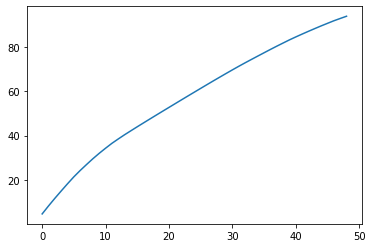

In [93]:
plt.plot(var1)

## The graph has not flattened at all.Hence we have to consider all the features(49) present in x-dataframe(cleaned_data).Hence not applying PCA to original data(x-dataframe)

In [94]:
type(x)

pandas.core.frame.DataFrame

In [95]:
x.shape

(4628338, 58)

In [96]:
x.head()

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,location_score1,location_score2,log_historical_price,listing_position,price_usd,has_promotion,destination_id,length_of_stay,booking_window,num_adults,num_kids,num_rooms,stay_on_saturday,log_click_proportion,distance_to_dest,random_sort,competitor1_rate,competitor1_has_availability,competitor1_price_percent_diff,competitor2_rate,competitor2_has_availability,competitor2_price_percent_diff,competitor3_rate,competitor3_has_availability,competitor3_price_percent_diff,competitor4_rate,competitor4_has_availability,competitor4_price_percent_diff,competitor5_rate,competitor5_has_availability,competitor5_price_percent_diff,competitor6_rate,competitor6_has_availability,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,day,hours,minutes,seconds,new_timeextract_1,new_timeextract2_2
0,-3.349342,-0.646451,0.656985,-0.245036,-0.213316,0.659526,-2.208802,0.749555,0.155065,-1.357824,0.235849,0.649520,0.910018,0.823972,0.145195,-0.589828,-0.061725,-0.13134,0.228965,-1.101461,-0.488517,-0.276709,0.986874,0.225825,-0.366954,2.132324,0.095975,-0.019196,-0.027591,-0.09004,-0.106499,-0.021339,-0.046481,-0.099727,-0.011644,-0.008152,-0.072741,-0.006851,-0.068462,-0.127795,-0.013983,-0.059448,-0.057873,-0.035077,-0.073608,-0.067765,-0.02948,0.035698,-0.031512,-0.010129,-1.017308,-0.221273,1.7658,-1.062408,1.701521,-0.432764,-1.985591,-1.543994
1,-3.349342,-0.646451,0.656985,-0.245036,-0.213316,0.659526,-1.683548,0.749555,0.155065,-1.357824,-0.101737,-0.464754,0.724693,2.264678,0.149501,-0.589828,-0.061725,-0.13134,0.228965,-1.101461,-0.488517,-0.276709,0.986874,0.225825,-0.366960,2.132324,0.095975,-0.019196,-0.027591,-0.09004,-0.106499,-0.021339,-0.046481,-0.099727,-0.011644,-0.008152,-0.072741,-0.006851,-0.068462,-0.127795,-0.013983,-0.059448,-0.057873,-0.035077,-0.073608,-0.067765,-0.02948,0.035698,-0.031512,-0.010129,-1.017308,-0.221273,1.7658,-1.062408,1.701521,-0.432764,-1.985591,-1.543994
2,-3.349342,-0.646451,0.656985,-0.245036,-0.213316,0.659526,-1.671904,1.745254,0.680441,0.736472,0.235849,0.276089,0.975426,0.920051,0.229008,1.695410,-0.061725,-0.13134,0.228965,-1.101461,-0.488517,-0.276709,0.986874,0.225825,-0.366967,2.132324,0.095975,-0.019196,-0.027591,-0.09004,-0.106499,-0.021339,-0.046481,-0.099727,-0.011644,-0.008152,-0.072741,-0.006851,-0.068462,-0.127795,-0.013983,-0.059448,-0.057873,-0.035077,-0.073608,-0.067765,-0.02948,0.035698,-0.031512,-0.010129,-1.017308,-0.221273,1.7658,-1.062408,1.701521,-0.432764,-1.985591,-1.543994
3,-3.349342,-0.646451,0.656985,-0.245036,-0.213316,0.659526,-1.132201,-0.246192,0.155065,-1.357824,0.262326,1.363253,0.779201,-0.810071,0.181766,-0.589828,-0.061725,-0.13134,0.228965,-1.101461,-0.488517,-0.276709,0.986874,0.225825,-0.366993,2.132324,0.095975,-0.019196,-0.027591,-0.09004,-0.106499,-0.021339,-0.046481,-0.099727,-0.011644,-0.008152,-0.072741,-0.006851,-0.068462,-0.127795,-0.013983,-0.059448,-0.057873,-0.035077,-0.073608,-0.067765,-0.02948,0.035698,-0.031512,-0.010129,-1.017308,-0.221273,1.7658,-1.062408,1.701521,-0.432764,-1.985591,-1.543994
4,-3.349342,-0.646451,0.656985,-0.245036,-0.213316,0.659526,-0.590129,1.745254,0.680441,-1.357824,0.149798,0.627837,1.035383,1.304321,0.471195,-0.589828,-0.061725,-0.13134,0.228965,-1.101461,-0.488517,-0.276709,0.986874,0.225825,-0.366954,2.132324,0.095975,-0.019196,-0.027591,-0.09004,-0.106499,-0.021339,-0.046481,-0.099727,-0.011644,-0.008152,-0.072741,-0.006851,-0.068462,-0.127795,-0.013983,-0.059448,-0.057873,-0.035077,-0.073608,-0.067765,-0.02948,0.035698,-0.031512,-0.010129,-1.017308,-0.221273,1.7658,-1.062408,1.701521,-0.432764,-1.985591,-1.543994


# Saving the cleaned data for future use

In [97]:
x.to_csv('OTAcleaneddtareview-2.csv')

# Model Building

In [98]:
y=y_oversampled
x=x

In [99]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [101]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

In [102]:
models=[]
#models.append(('KNeighborsClassifier',knn))
#models.append(('SVC',svc))
#models.append(('LogisticRegression',lr))
#models.append(('DecisionTreeClassifier',dt))
#models.append(('GaussianNB',gnb))
#models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))
#models.append(('GradientBoostingClassifier',gbc))
#models.append(('AdaBoostClassifier',ada))

In [103]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,recall_score

***************** XGBClassifier *******************


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


Accuracy_score  - 1.0


cross_val_score  - 1.0


roc_auc_score  - 1.0


Recall_score  - 1.0


classification report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    578543
           1       1.00      1.00      1.00    578542

    accuracy                           1.00   1157085
   macro avg       1.00    

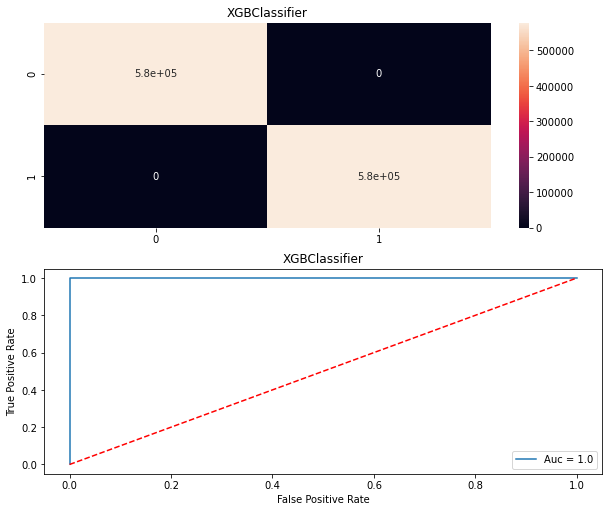

In [104]:
Model=[]
score=[]
cv=[]
rocscore=[]
recall=[]
for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='recall').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    
    fpr,tpr,threshold=roc_curve(y_test,pre)
    roc_auc=auc(fpr,tpr)
    print('roc_auc_score  -',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    re=recall_score(y_test,pre)
    print('Recall_score  -',re)
    recall.append(re*100)
    print('\n')
    
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr,tpr,label='Auc = ' +str(roc_auc))
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
    
    
    

In [105]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Recall_score':recall,'Cross_val_score':cv,'auc_score':rocscore})
result

,Model,Accuracy_score,Recall_score,Cross_val_score,auc_score
0,XGBClassifier,100.0,100.0,100.0,100.0


# GridsearchCV (Not applying as it will take lot of time and this is just a review. any ways our score is 100%.)for checking model robustness we can check the CVS score of the model.

# saving the XGBClassifier model

In [106]:
#From all the model tried above XGBClassifier model cross_val_score is best=%,

#Hence saving the final model as XGBClassifier.
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)
xgb=XGBClassifier()
xgb.fit(x,y)
pred=xgb.predict(x_test)
print('recall_score=  ',recall_score(y_test,pred))
print('roc_score='     ,roc_auc_score(y_test,pred))

#Warning because the dataset is huge,check link below
#-->https://datascience.stackexchange.com/questions/21655/how-can-i-do-tree-method-exact-in-xgboost-classifier

[19:51:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\gbm\gbtree.cc:139: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
recall_score=   1.0
roc_score= 1.0


# crossvalidationan CVS(not doing)

# Saving the joblib file

In [107]:
import joblib

In [108]:

joblib.dump(xgb,'OTA_review2.obj')

['OTA_review2.obj']

# Loading the file

In [109]:
model=joblib.load('OTA_review2.obj')

In [110]:
Final_predictions=model.predict(x_test)
Final_predictions=pd.DataFrame(Final_predictions,columns=['booked(1) or notbooked(0)'])
Final_predictions[:5]

,booked(1) or notbooked(0)
0,0
1,0
2,0
3,1
4,0


In [111]:
Final_predictions.sample(n=10)

,booked(1) or notbooked(0)
169598,0
897711,0
907810,1
1039832,1
645683,0
492856,1
999660,0
380401,0
227211,1
653449,1


# Saving final predictions in file.csv format

In [112]:
Final_predictions.to_csv('E:\\final_predictions_OTA_review2_xgb .csv',index=False)

# Conclusion:-

# From problem statement---Question 1